In [147]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vitualization
import seaborn as sns

# transformation
import scipy

import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# data prepossessing, PCA , kmean and Hierarchy dependencies
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, normalize

# features engineering
from sklearn.preprocessing import PolynomialFeatures

# gradient boost decision trees
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

In [148]:
# load dataset
heart_train_data = pd.read_csv("heart.csv")
heart_train_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

## Perform Exploratory Data Analysis:
### Explore for missing values, observe data type, Data virtualication in bar and Pie chat. Check for correlation among the dependent variables search for any posible connection among the variables. Explore feature engineering in necessay.

In [149]:
# explore the data column type distribution
heart_train_data.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [150]:
# explore column stat
heart_train_data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [151]:
# checking for missing values
count = heart_train_data.isnull().sum().sort_values(ascending=False)
percentage = ((heart_train_data.isnull().sum()/len(heart_train_data)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for all the columns:')
missing_application

Count and percentage of missing values for all the columns:


Count  Percentage
age           0         0.0
sex           0         0.0
cp            0         0.0
trestbps      0         0.0
chol          0         0.0
fbs           0         0.0
restecg       0         0.0
thalach       0         0.0
exang         0         0.0
oldpeak       0         0.0
slope         0         0.0
ca            0         0.0
thal          0         0.0
target        0         0.0

In [152]:
print ('*'*10,'Dataset Information','*'*10)
heart_train_data.info()

********** Dataset Information **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [153]:
heart_train_data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

<IPython.core.display.Javascript object>


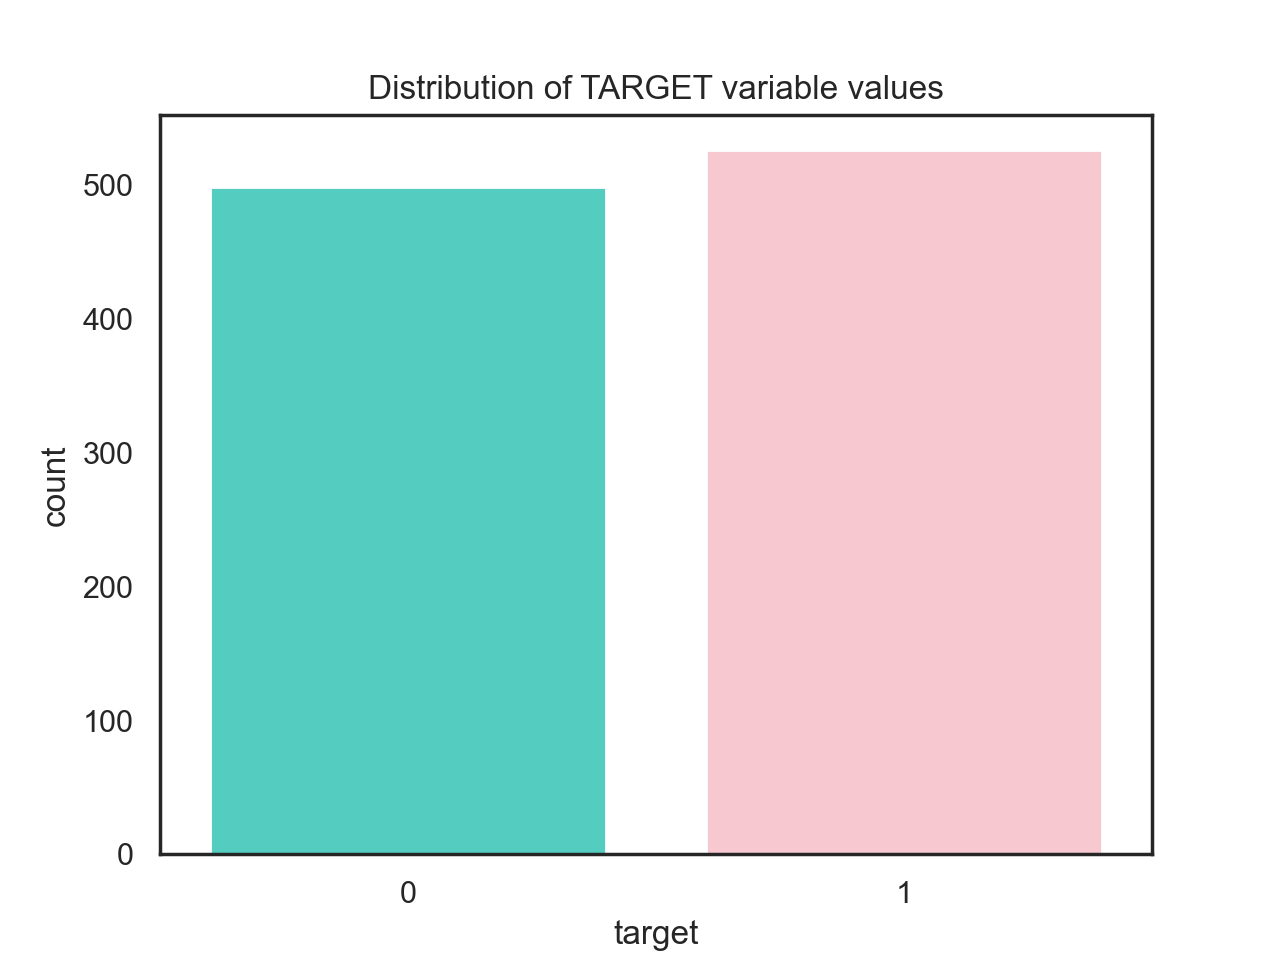

In [154]:
plt.title('Distribution of TARGET variable values')
sns.countplot(x=heart_train_data.target, palette= ["#40E0D0", "pink"]);

<IPython.core.display.Javascript object>


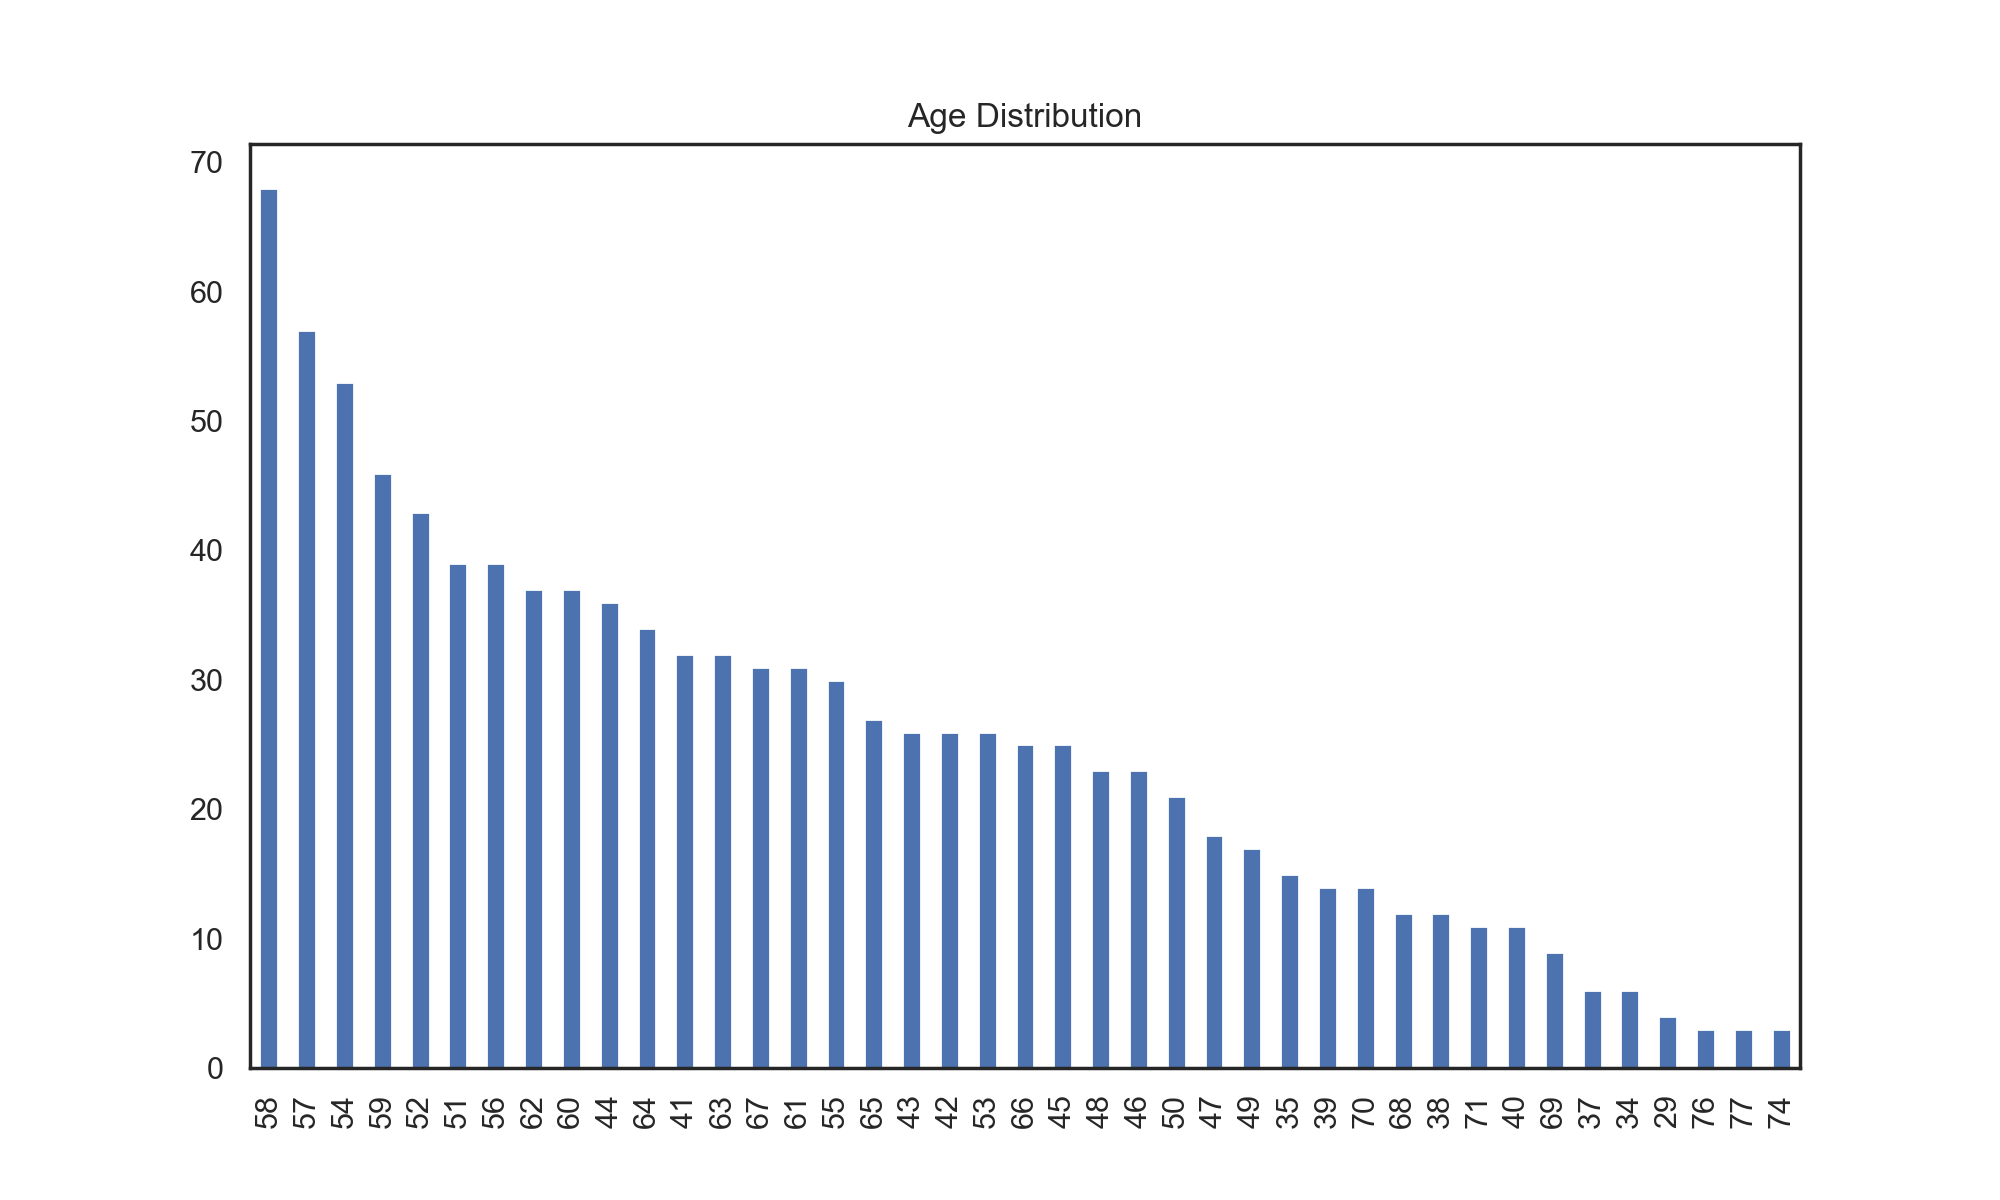

Text(0.5, 1.0, 'Age Distribution')

In [155]:
# print(df.age.value_counts())
plt.figure(figsize=(10,6))
heart_train_data['age'].value_counts().plot(kind='bar').set_title('Age Distribution')

<IPython.core.display.Javascript object>


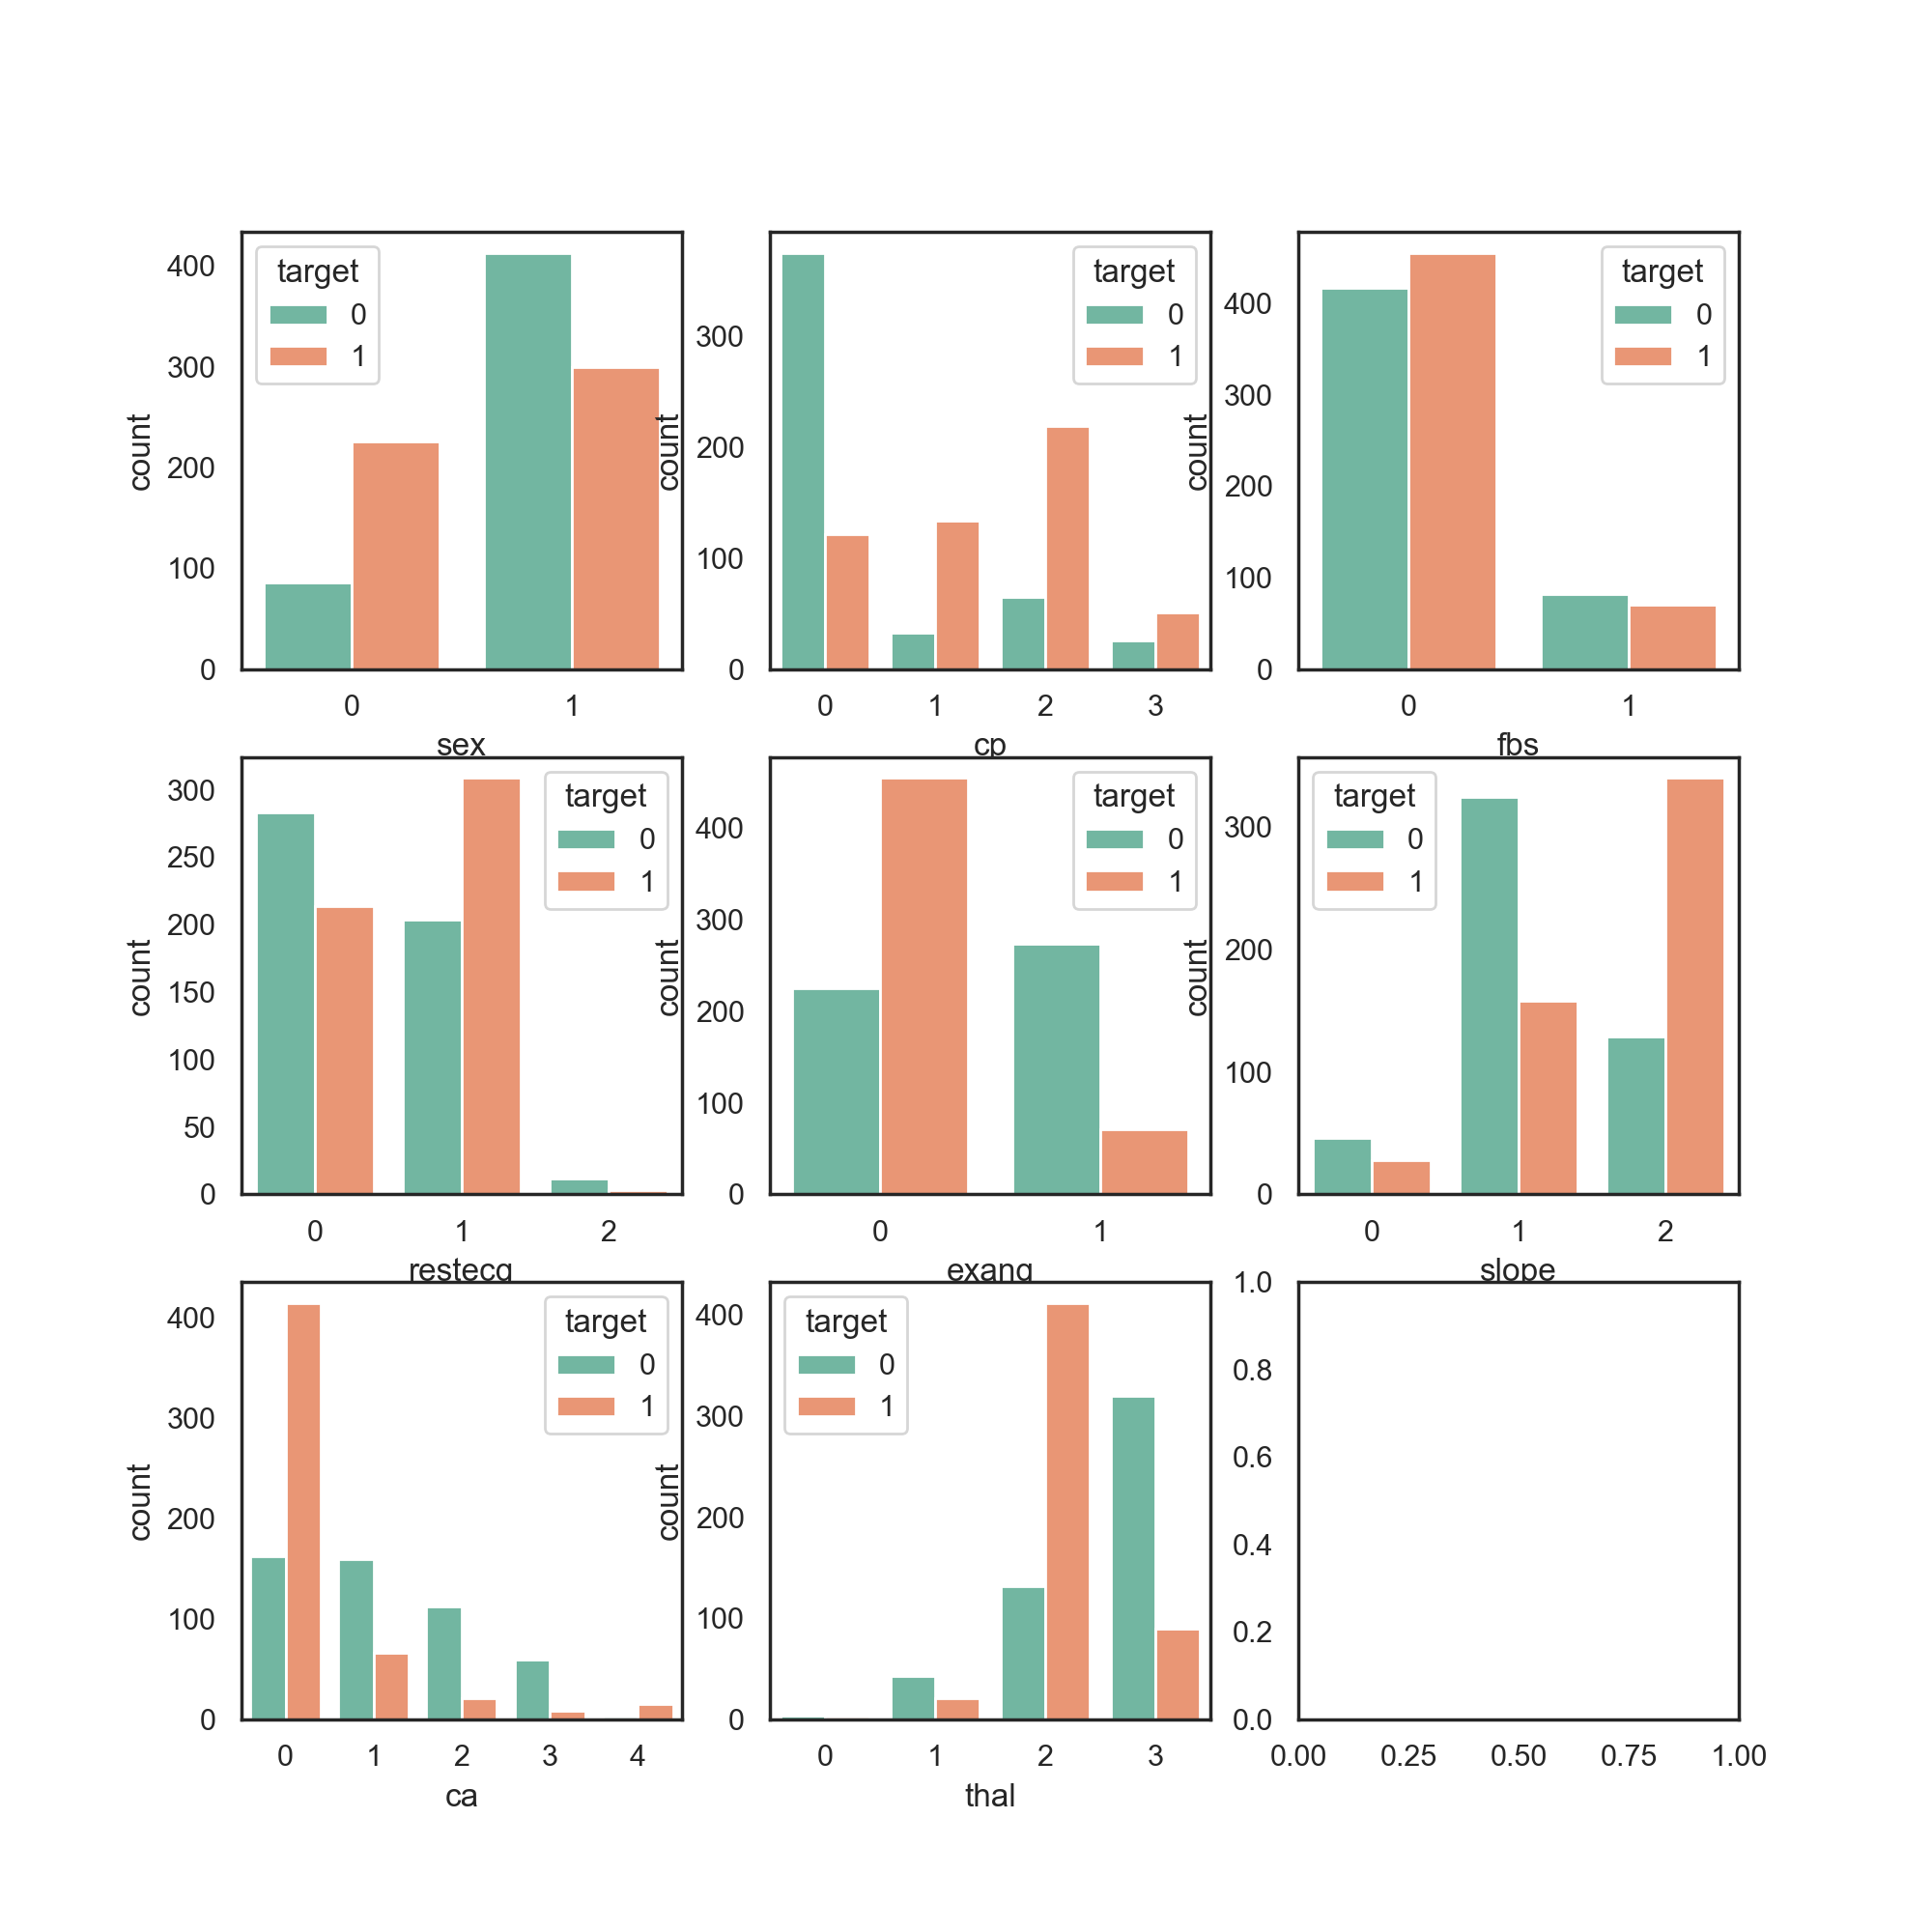

In [156]:
# for plotting, group categorical features in cat_feat
# to create dist in 8 feature, 9th is the target, 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=heart_train_data, ax=ax, palette='Set2')

In [157]:
# ploting categorical data
def cat_feature_plot(cat):

 feature_value=heart_train_data[cat].value_counts().values
 feature_index=heart_train_data[cat].value_counts().index

 plt.figure(figsize=(10,5))
 plt.style.use('seaborn-dark-palette')
 plt.suptitle('*'*10+'distribution of categorical feature : {}'.format(cat)+'*'*10 , fontweight='heavy')
##### pie chart ####
 plt.subplot(1,2,1)
 plt.pie(feature_value , labels=feature_index,autopct='%1.1f%%')
 plt.title('pie chart')


###### bar plot  ####
 plt.subplot(1,2,2)
 plt.bar(x=feature_index,height=feature_value,color=['blue','green','red','pink','yellow'])
 plt.xticks(feature_index)
 plt.title('bar chart')

<IPython.core.display.Javascript object>


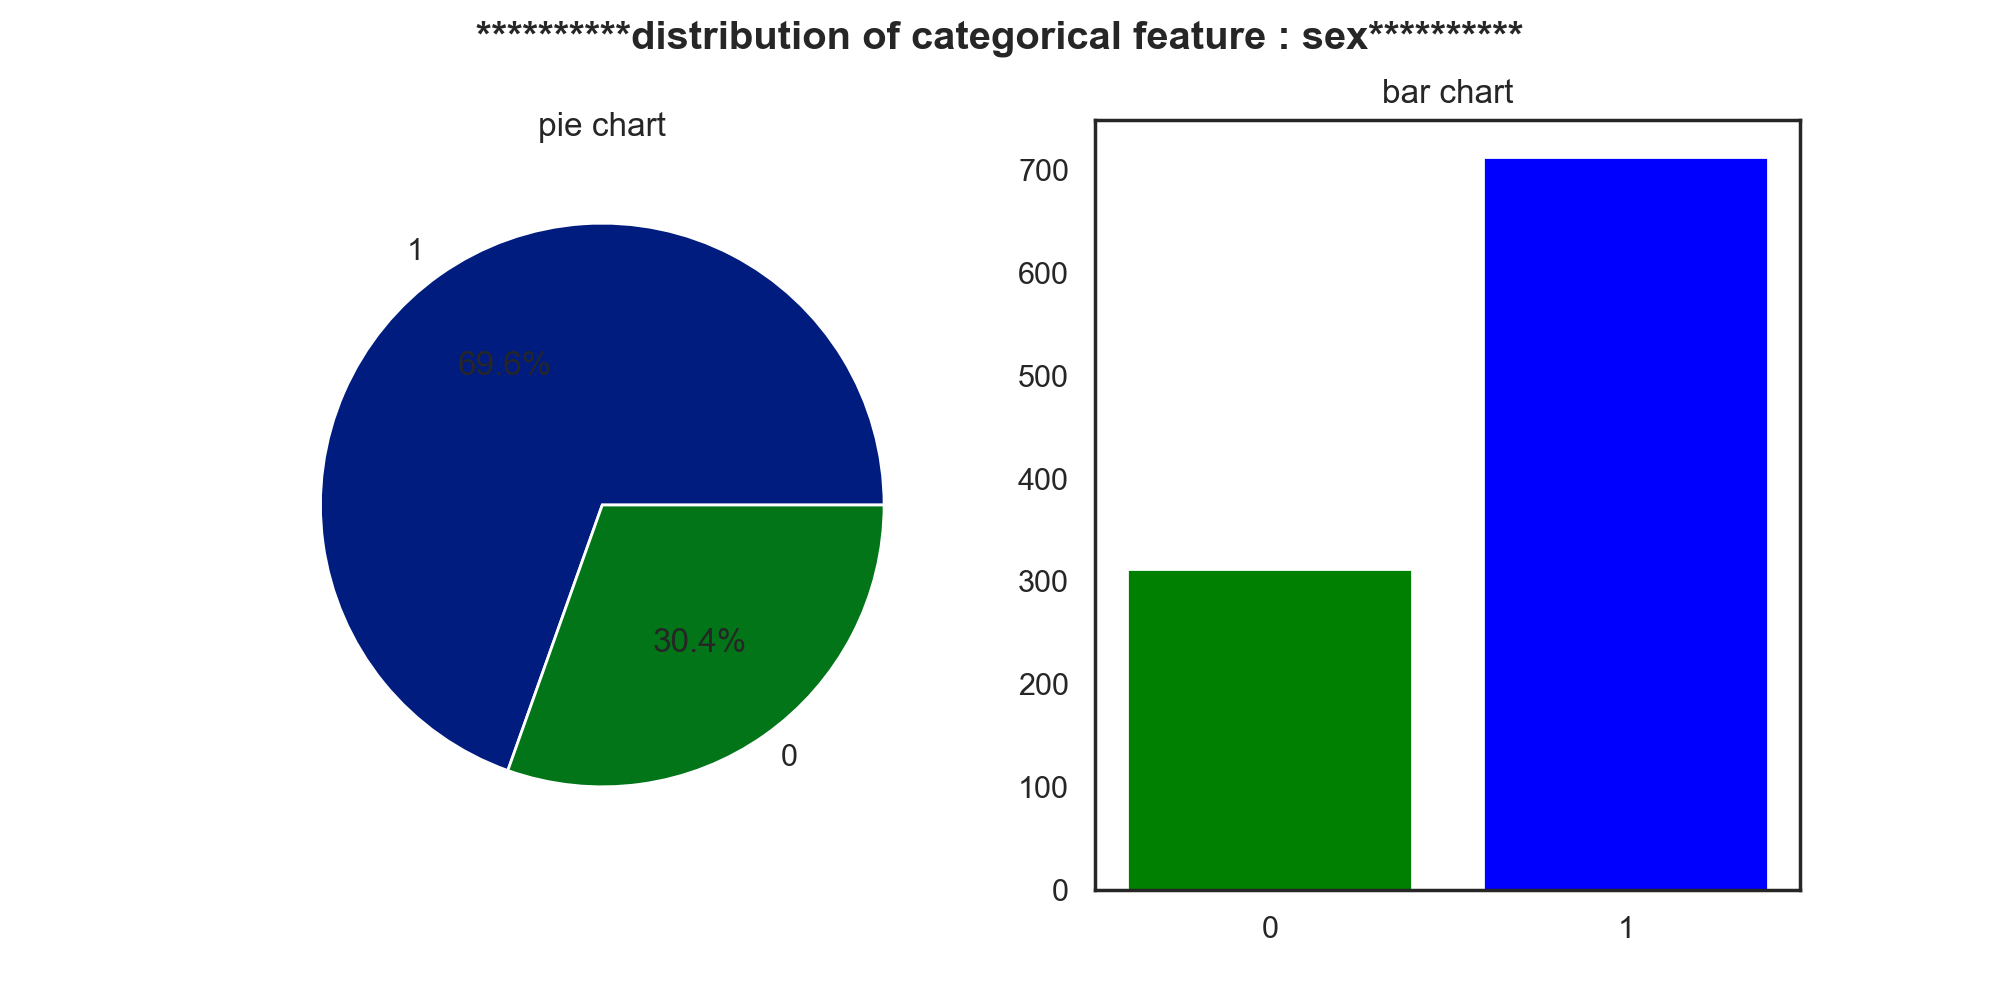

<IPython.core.display.Javascript object>


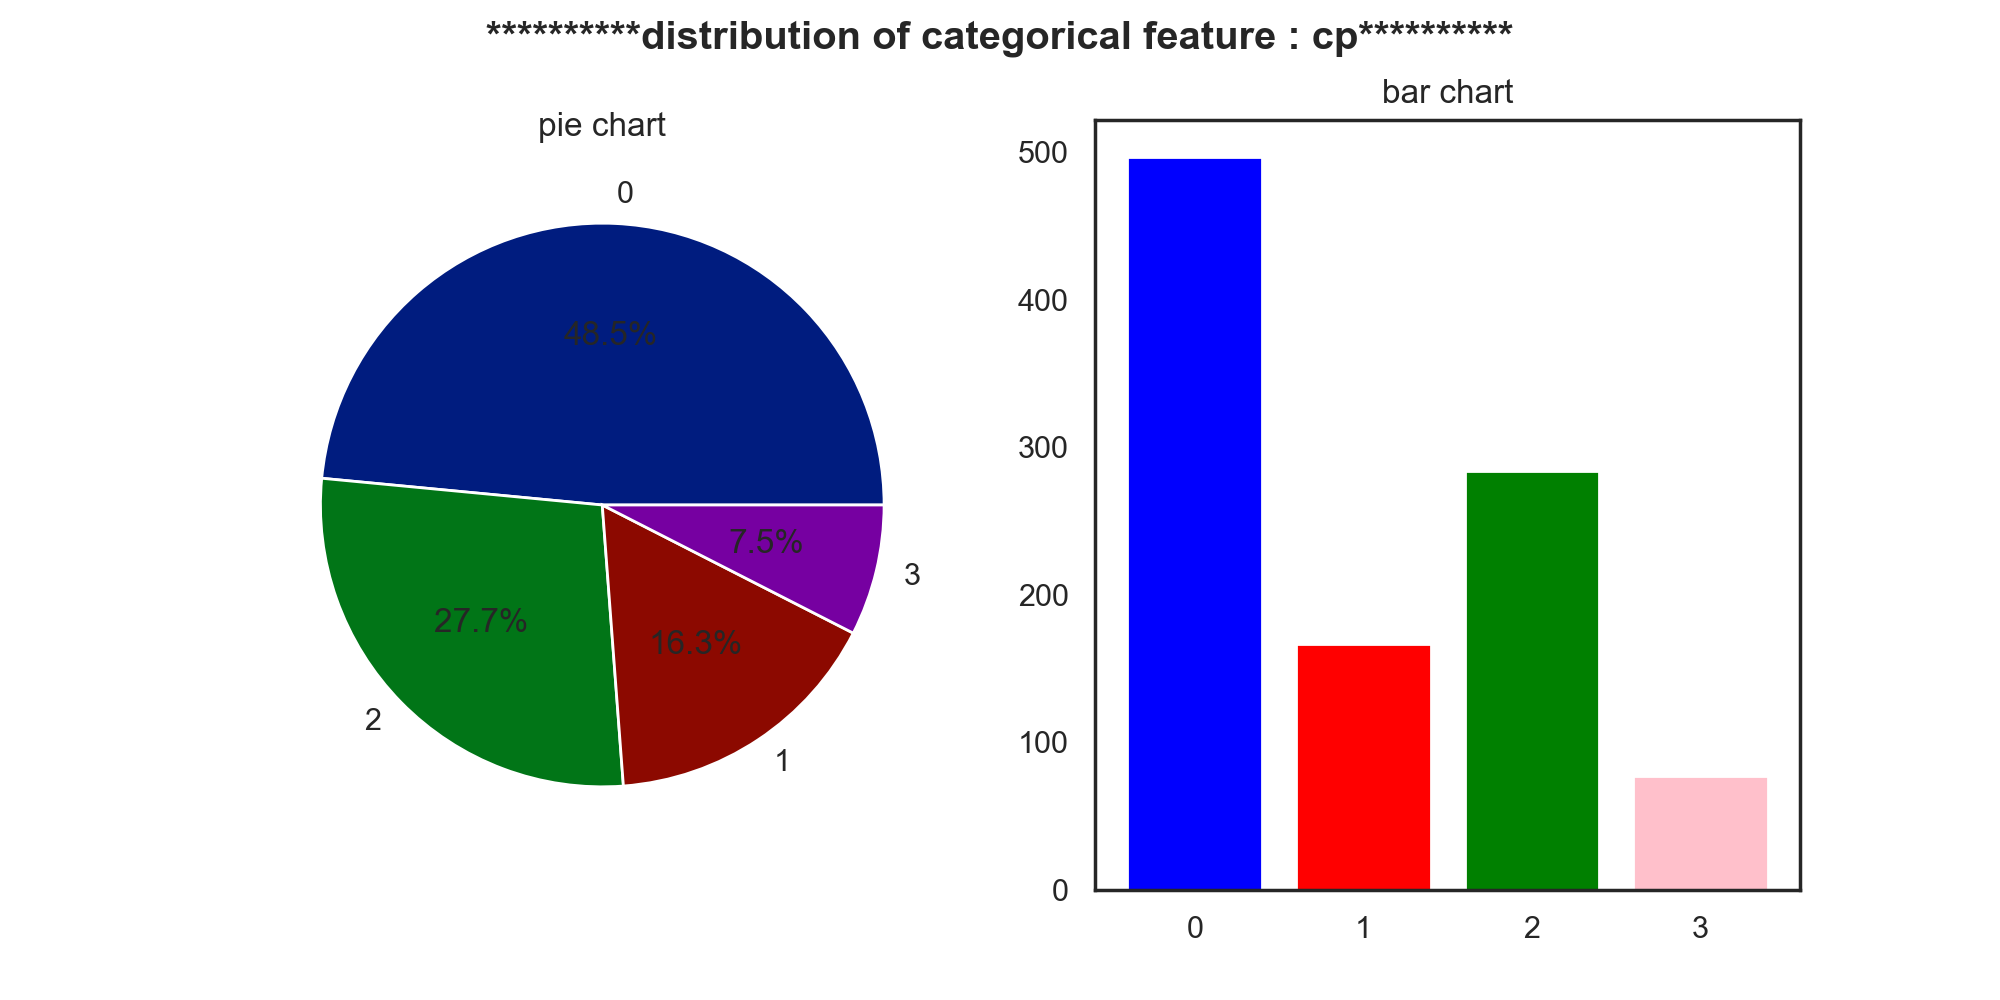

<IPython.core.display.Javascript object>


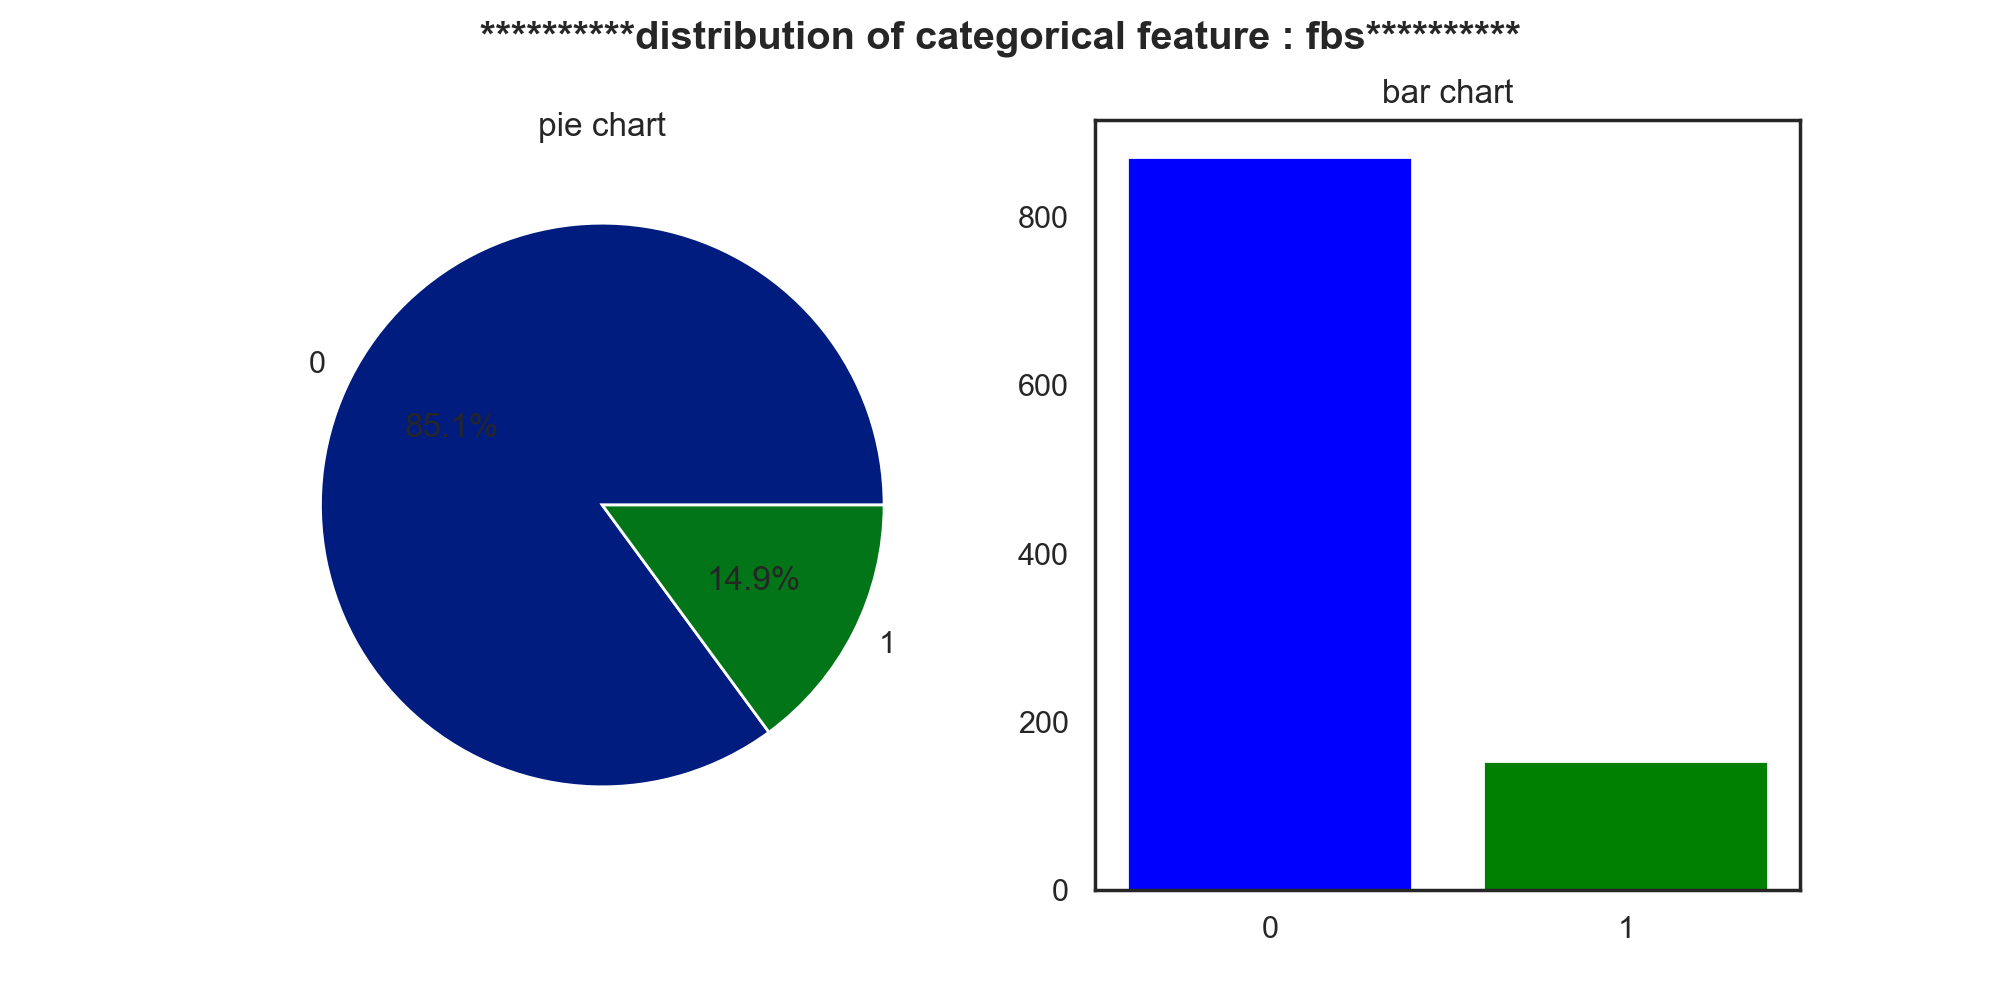

<IPython.core.display.Javascript object>


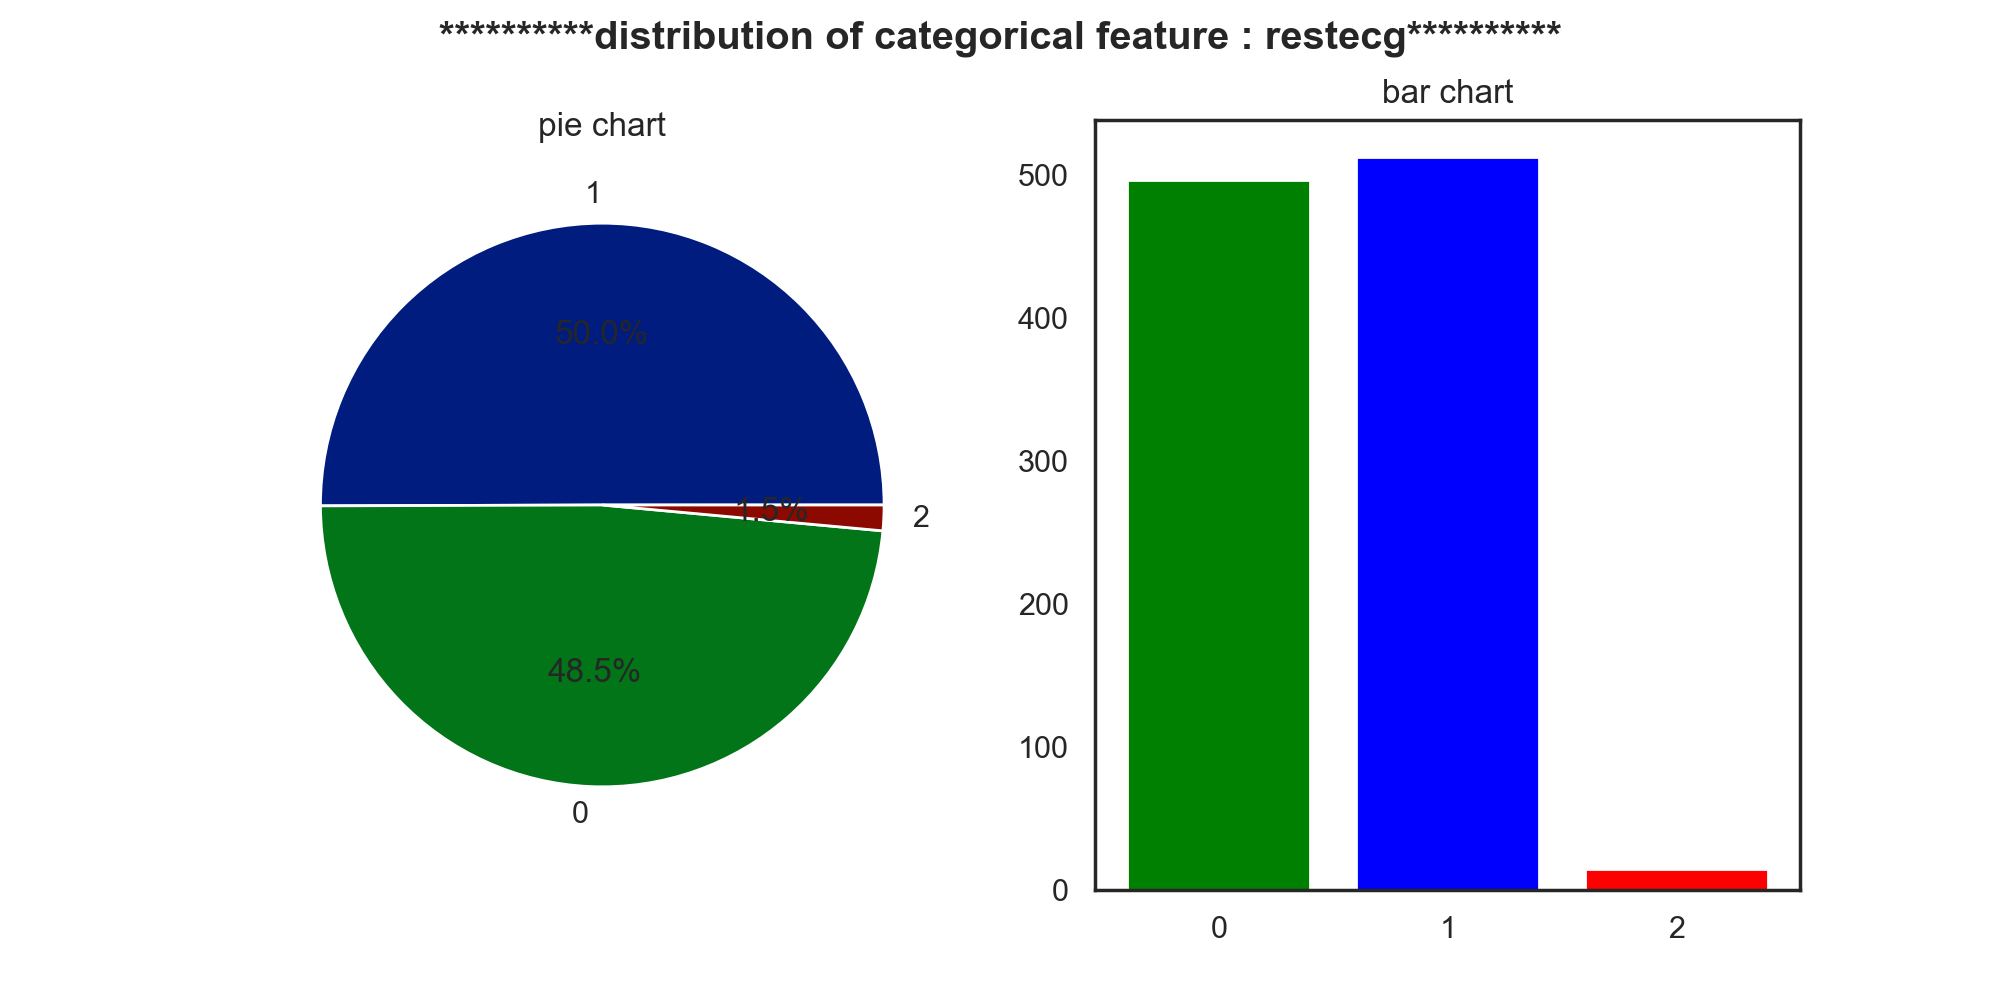

<IPython.core.display.Javascript object>


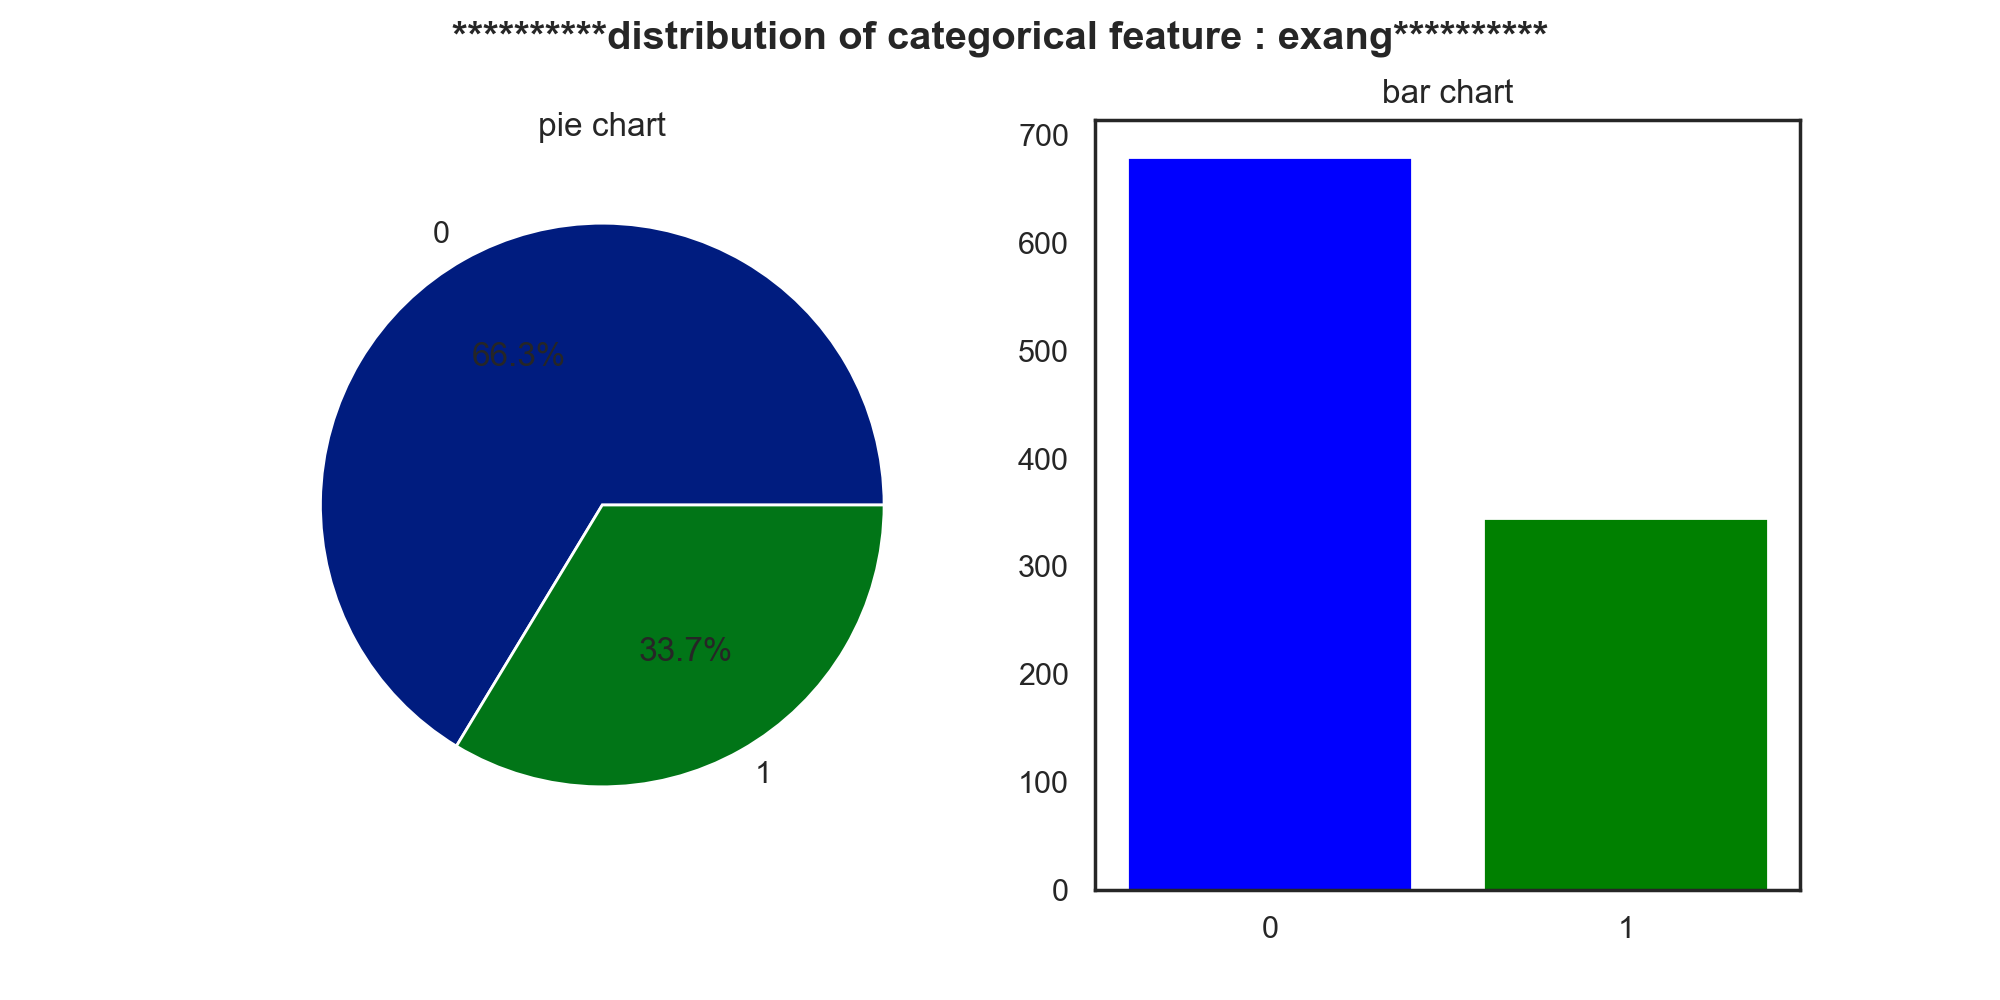

<IPython.core.display.Javascript object>


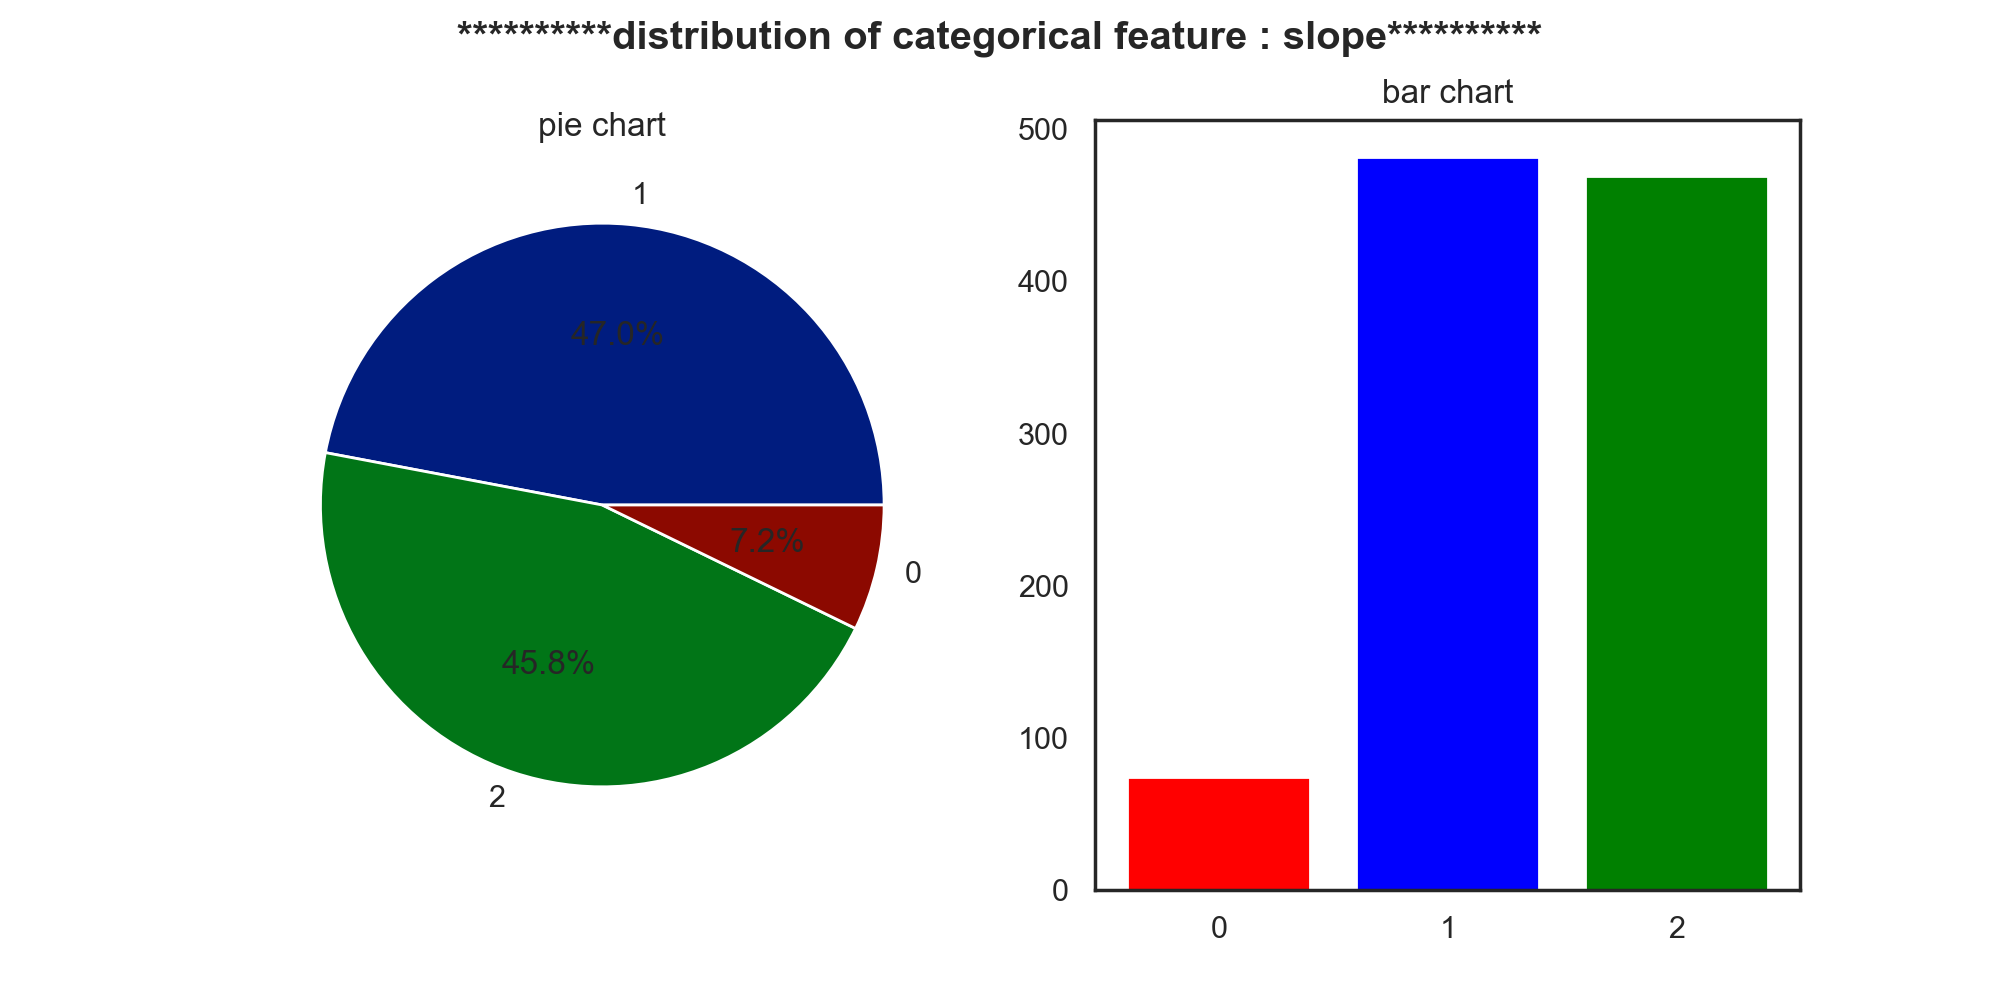

<IPython.core.display.Javascript object>


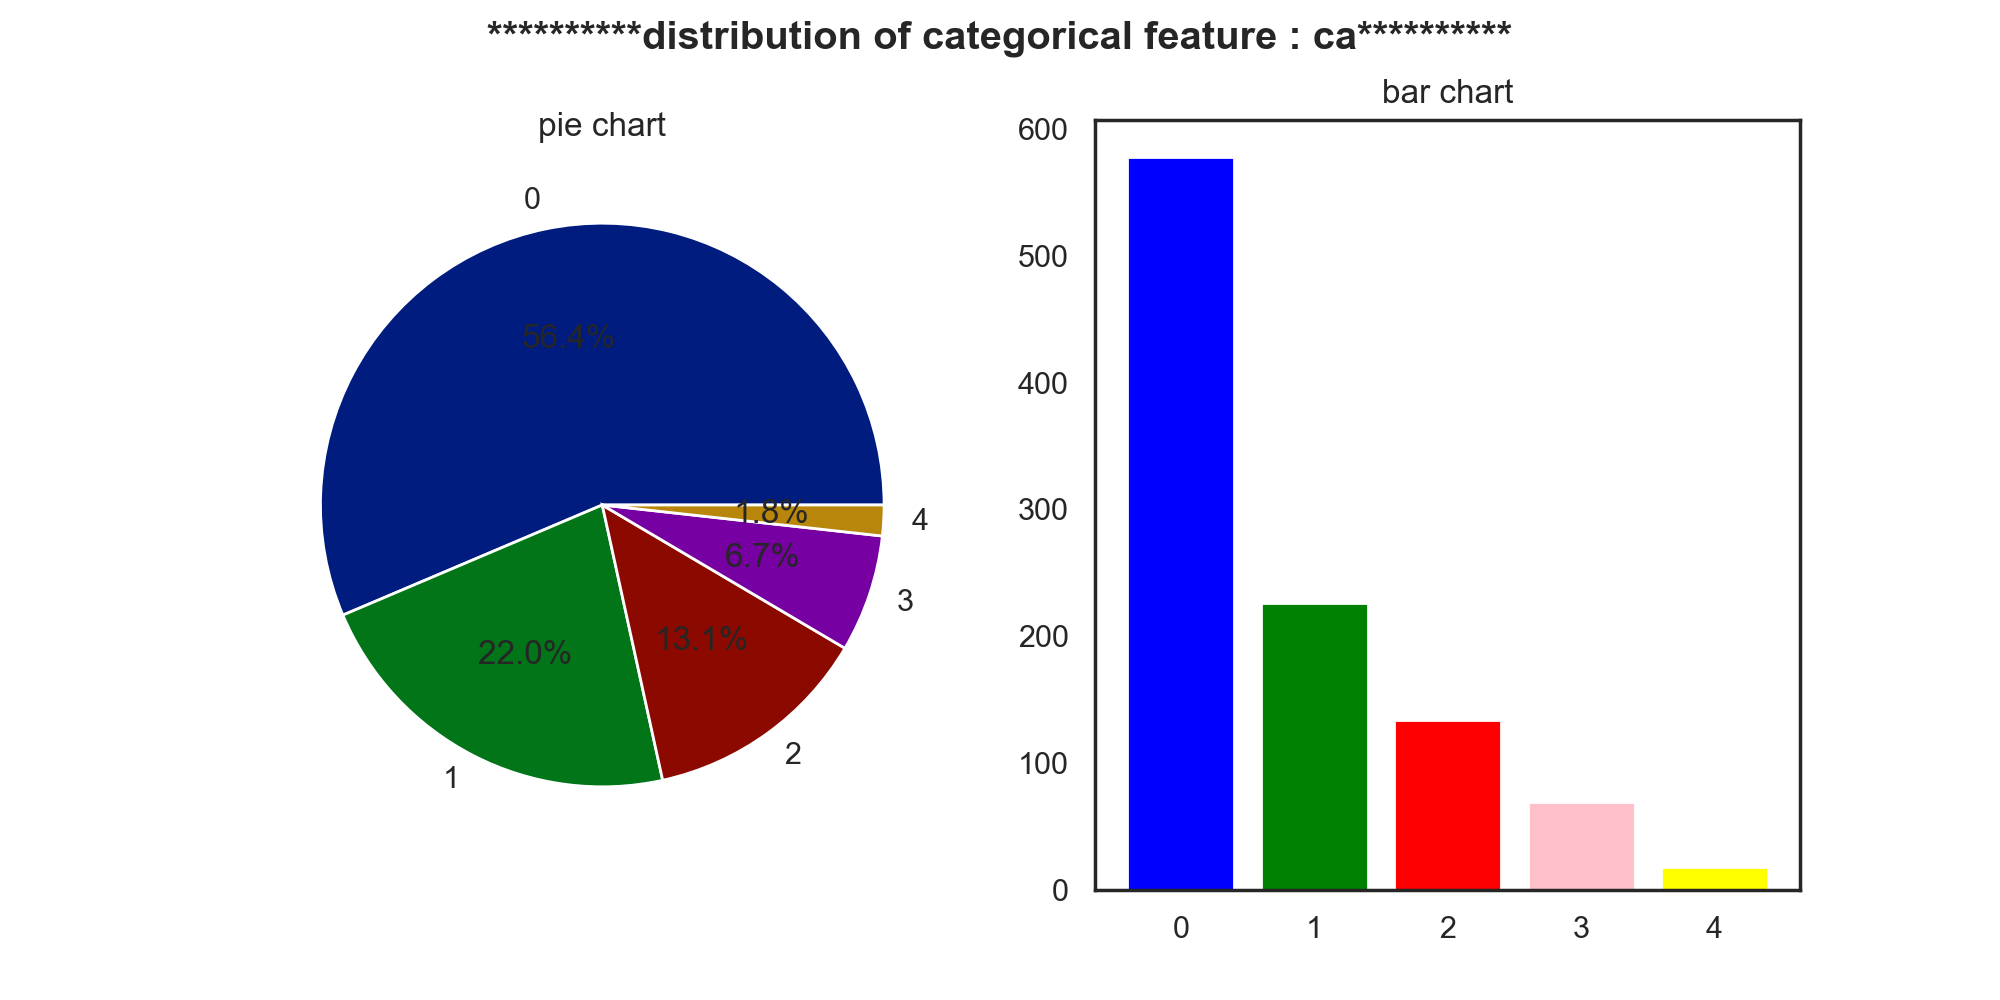

<IPython.core.display.Javascript object>


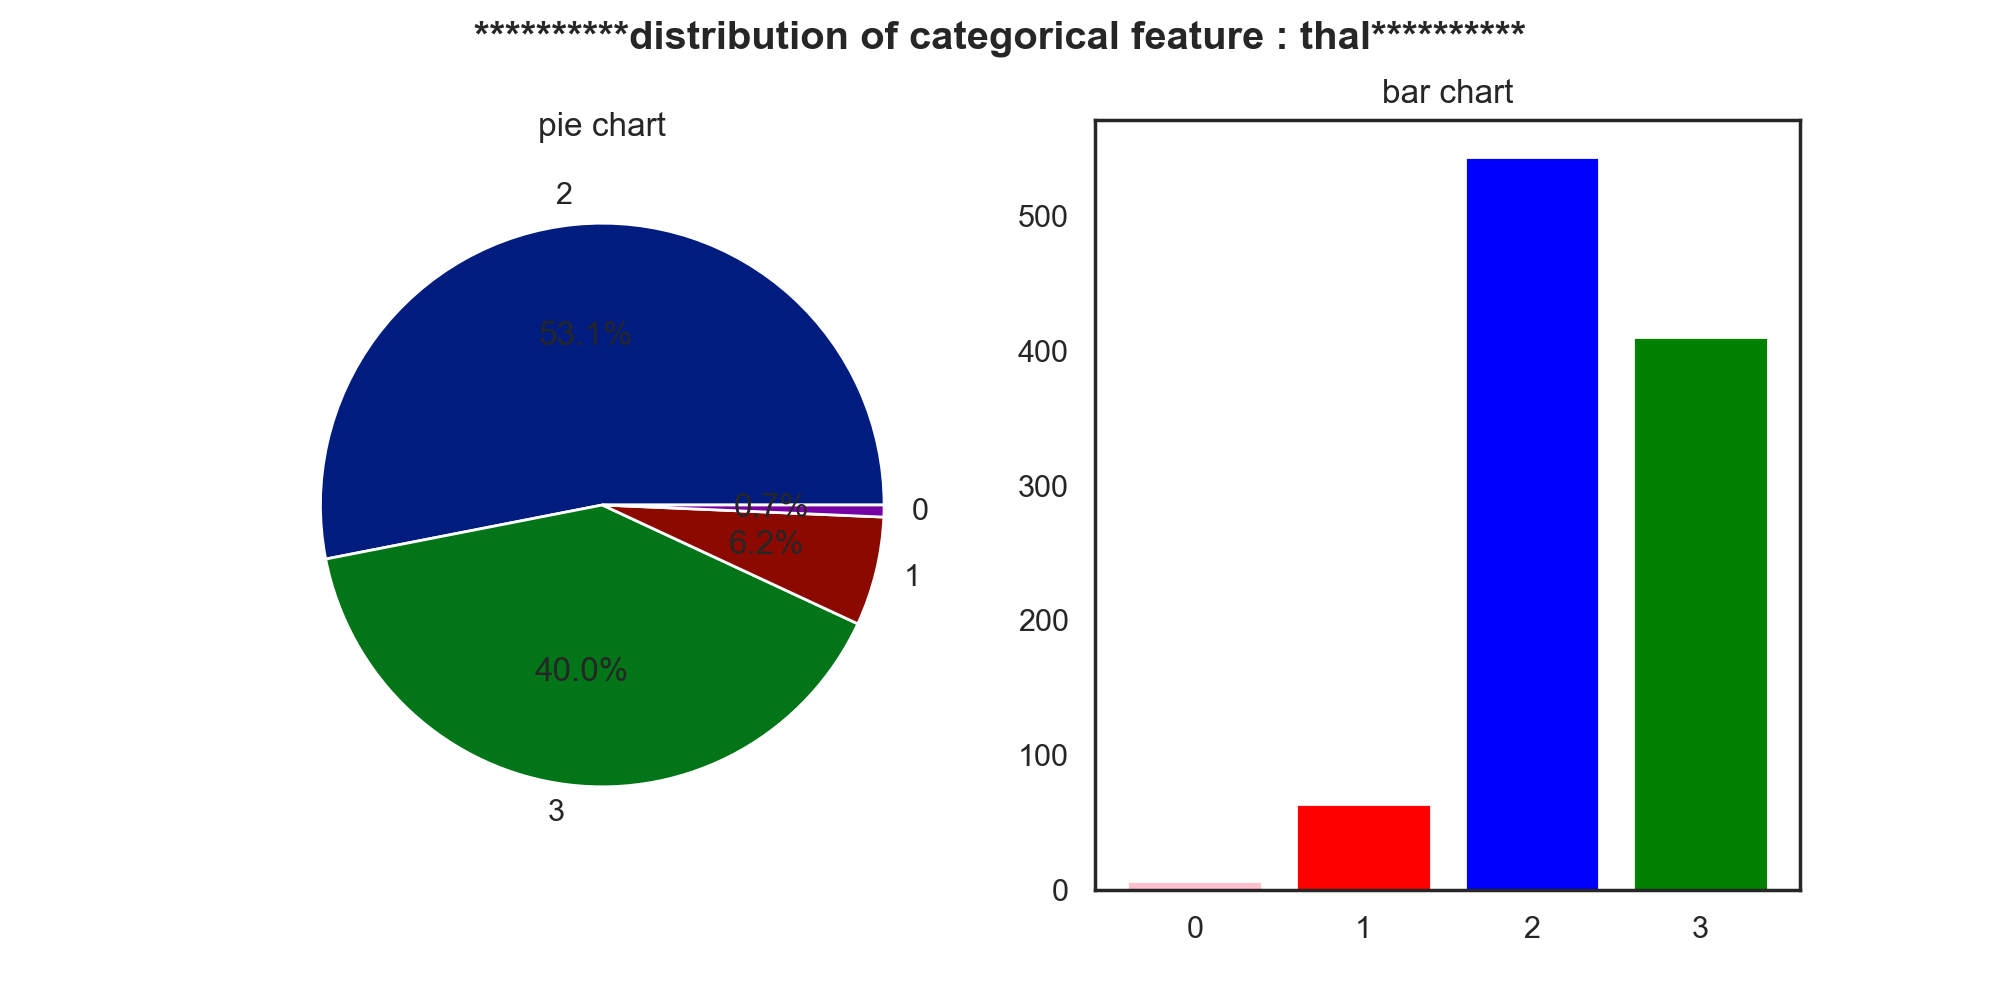

[None, None, None, None, None, None, None, None]

In [158]:
cat=['sex','cp','fbs','restecg','exang','slope' ,'ca','thal' ]
list(map(cat_feature_plot,cat))

<IPython.core.display.Javascript object>


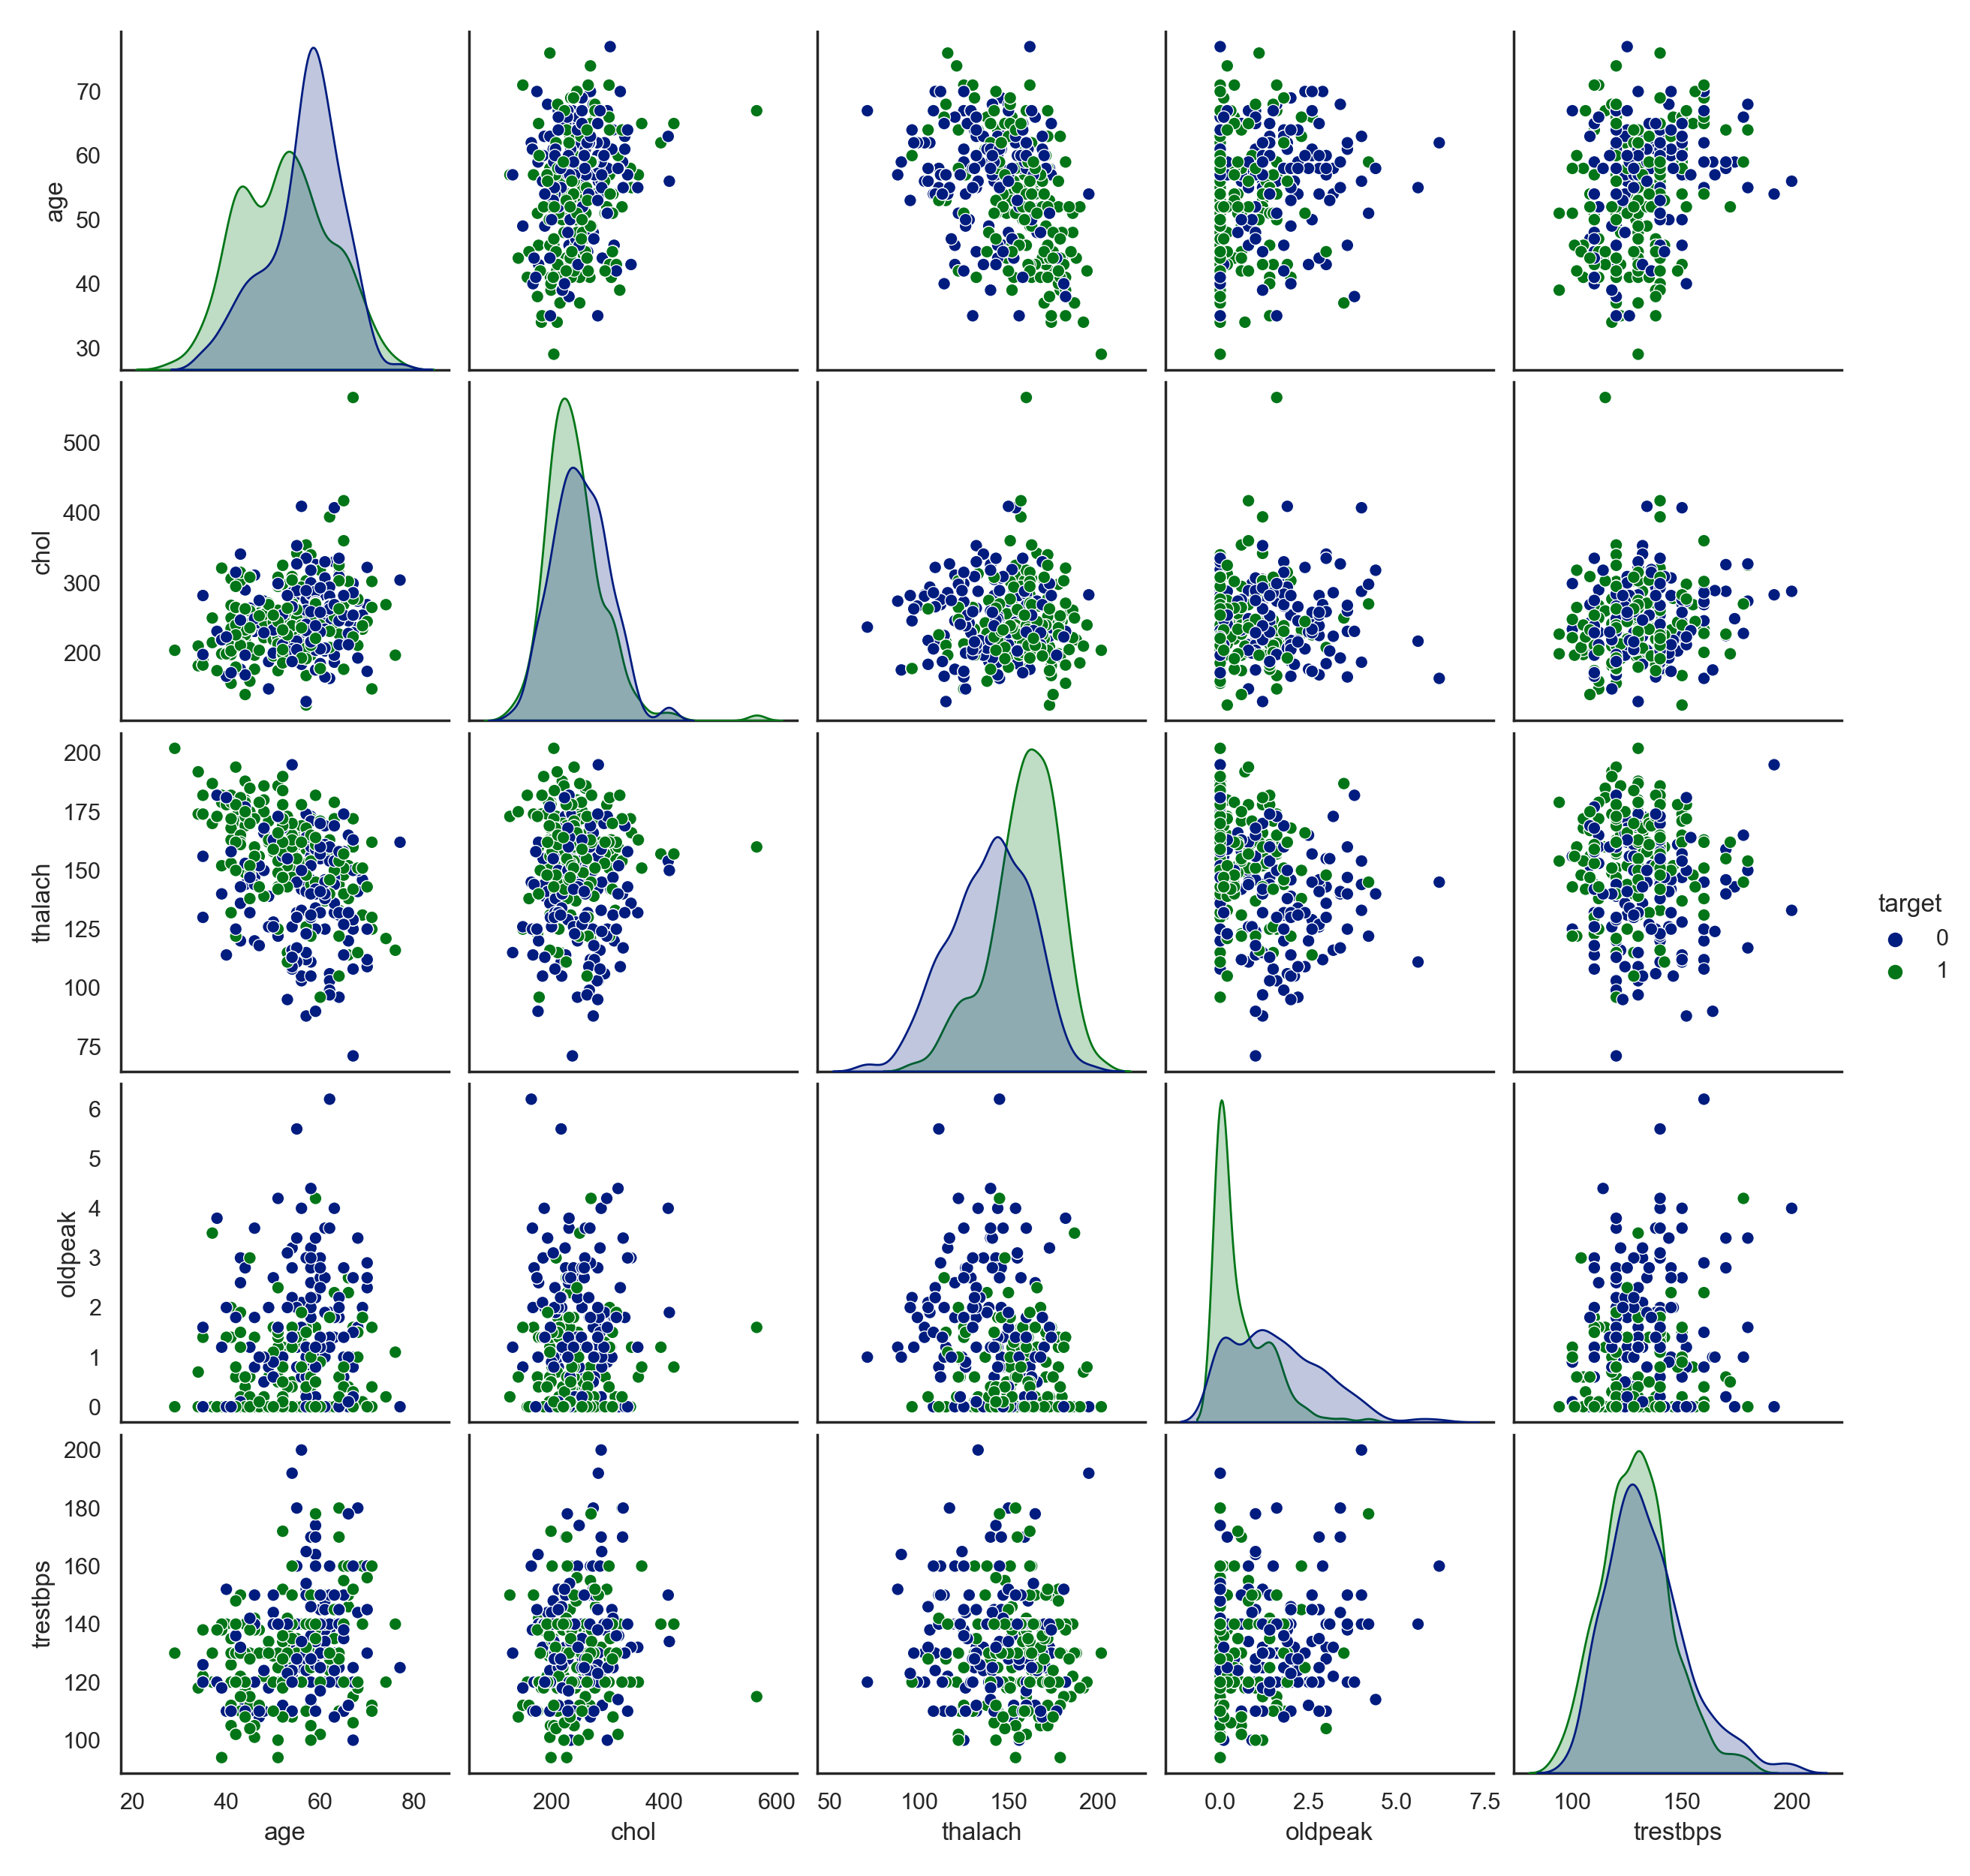

In [159]:
# define continuous variable across target & plot
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']  
sns.pairplot(heart_train_data[continous_features + ['target']], hue='target')

## Features Selection
### Used correlation matrix to get top positive and negative correlation with respect to the target. Use of random forest classifier to obtain important features

In [160]:
# examine feature corelation with target
correlations_positive = heart_train_data.corr()['target'].sort_values(ascending= False)

correlations_positive.head(5)

target     1.000000
cp         0.434854
thalach    0.422895
slope      0.345512
restecg    0.134468
Name: target, dtype: float64

In [161]:
# examine feature corelation with target
correlations_negative = heart_train_data.corr()['target'].sort_values(ascending= True)

correlations_negative.head(5)

oldpeak   -0.438441
exang     -0.438029
ca        -0.382085
thal      -0.337838
sex       -0.279501
Name: target, dtype: float64

<IPython.core.display.Javascript object>


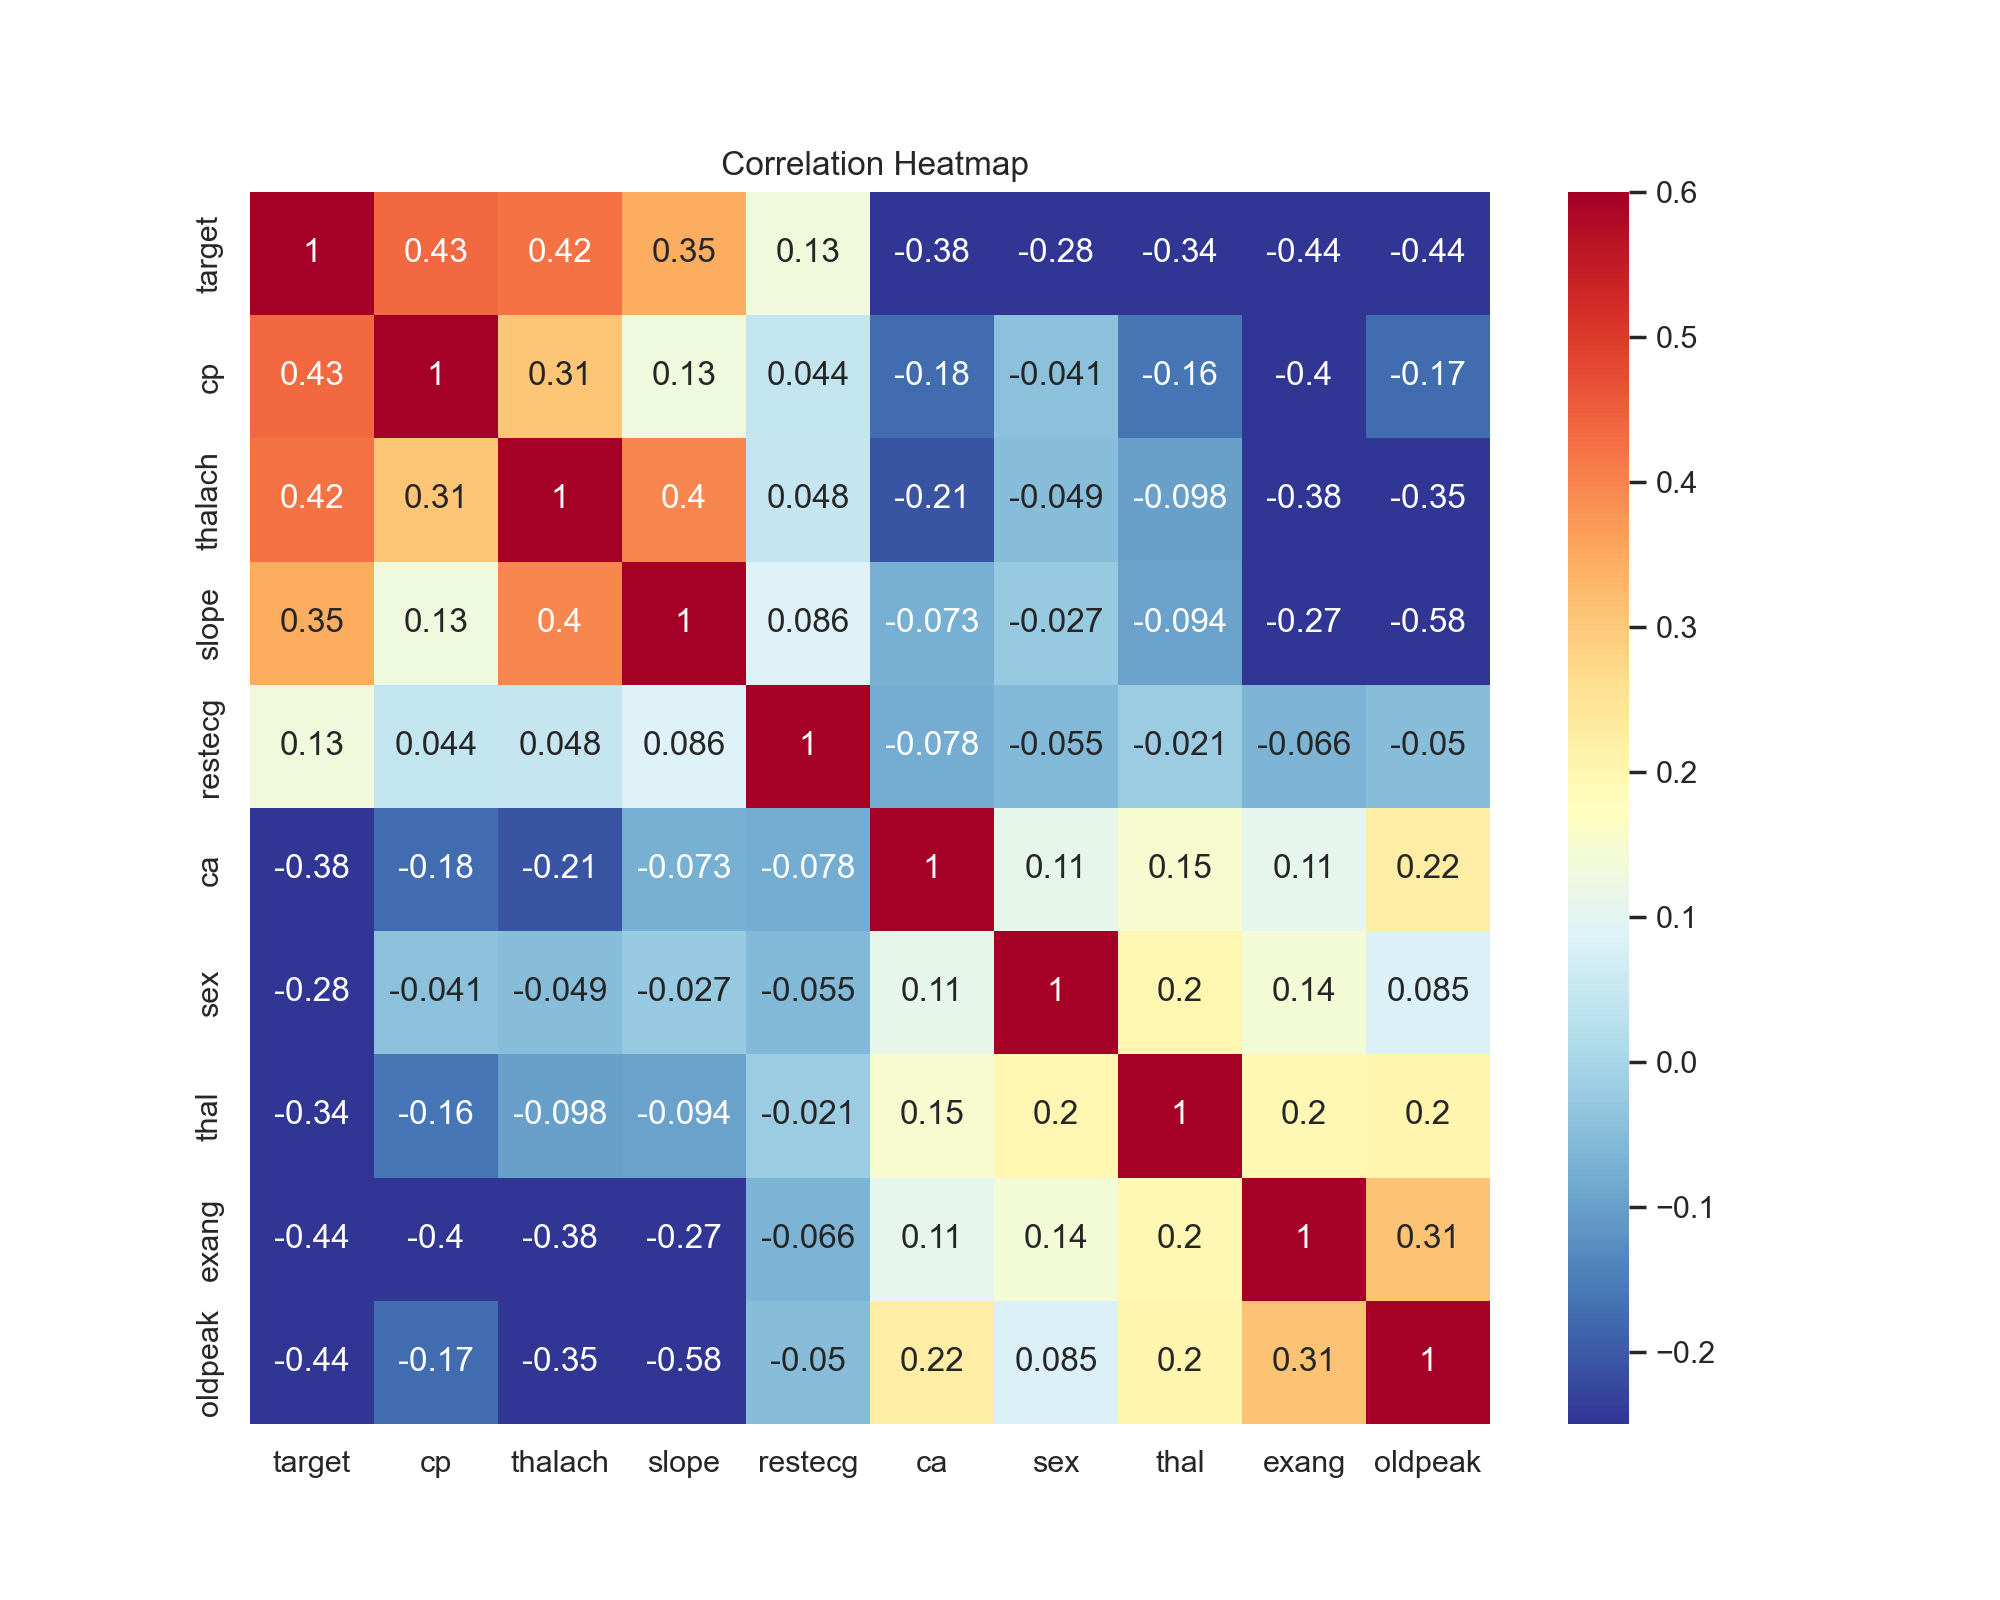

In [162]:
neg_posi_cor_df = heart_train_data[['target', 'cp', 'thalach', 'slope', 'restecg','ca', 'sex', 'thal', 'exang', 'oldpeak']]
corrs = neg_posi_cor_df.corr()

plt.figure(figsize = (10, 8))

# Correlation Heatmap of the Exterior Sources
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title(' Correlation Heatmap');

In [163]:
corrs

target        cp   thalach     slope   restecg        ca       sex  \
target   1.000000  0.434854  0.422895  0.345512  0.134468 -0.382085 -0.279501   
cp       0.434854  1.000000  0.306839  0.131633  0.043581 -0.176206 -0.041119   
thalach  0.422895  0.306839  1.000000  0.395308  0.048411 -0.207888 -0.049365   
slope    0.345512  0.131633  0.395308  1.000000  0.086086 -0.073440 -0.026666   
restecg  0.134468  0.043581  0.048411  0.086086  1.000000 -0.078072 -0.055117   
ca      -0.382085 -0.176206 -0.207888 -0.073440 -0.078072  1.000000  0.111729   
sex     -0.279501 -0.041119 -0.049365 -0.026666 -0.055117  0.111729  1.000000   
thal    -0.337838 -0.163341 -0.098068 -0.094090 -0.020504  0.149014  0.198424   
exang   -0.438029 -0.401513 -0.380281 -0.267335 -0.065606  0.107849  0.139157   
oldpeak -0.438441 -0.174733 -0.349796 -0.575189 -0.050114  0.221816  0.084687   

             thal     exang   oldpeak  
target  -0.337838 -0.438029 -0.438441  
cp      -0.163341 -0.401513 -0.174733  
thalach -0.098068 -0.380281 -0.349796  
slope   -0.094090 -0.267335 -0.575189  
restecg -0.020504 -0.065606 -0.050114  
ca       0.149014  0.107849  0.221816  
sex      0.198424  0.139157  0.084687  
thal     1.000000  0.197201  0.202672  
exang    0.197201  1.000000  0.310844  
oldpeak  0.202672  0.310844  1.000000

<IPython.core.display.Javascript object>


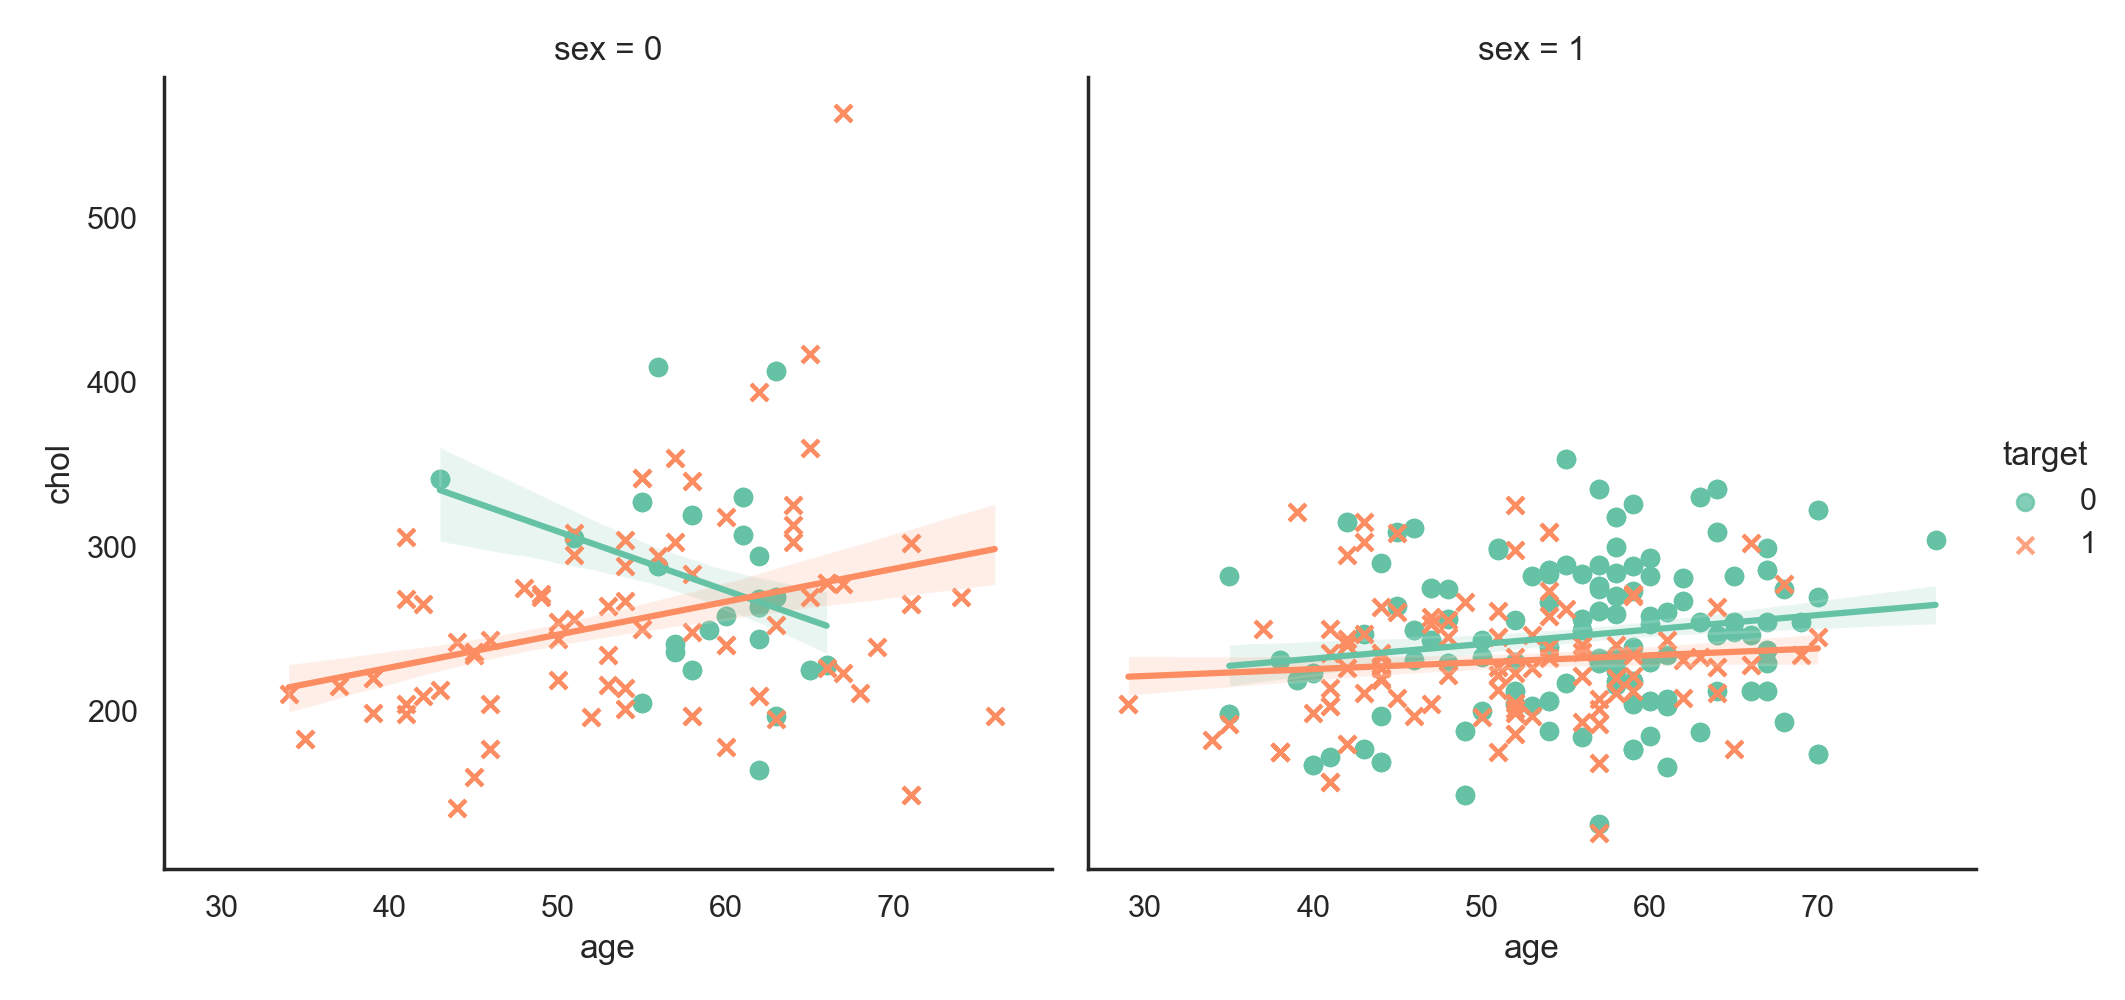

In [164]:
# to understand the relationship between age and chol in each of the sex, based on target.
sns.lmplot(x="age", 
           y="chol", 
           hue="target", 
           col="sex",
          #  row="target",
          #  order=2, 
           markers=["o", "x"],
           palette="Set2",
           data=heart_train_data)
plt.show()

In [165]:
# using random forest to extract important features
# drop all NAN if there is any
heart_train_data = heart_train_data.dropna()

In [166]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the Training data
if 'target' in heart_train_data:
    Train = heart_train_data.drop(columns = ['target'])
else:
    Train= heart_train_data.copy()
    
# Feature names
features = list(Train.columns)


# Median imputation of missing values
# Replacing missing values with the median value in the column using the SimpleImputer class from sklearn.impute
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit the imputer to the Training data i.e. compute the chosen statistic (median) for each column in the dataset.
imputer.fit(Train)

# Transform Training 
Train = imputer.transform(Train)

# Fit the Scaler to the data i.e. compute the range of values for each numeric column.
scaler.fit(Train)
Train = scaler.transform(Train)


print('Training data size: ', Train.shape)




Training data size:  (1025, 13)


In [167]:
#rnd_Train_data = Train_data[numerical_cols]

X = Train
y = heart_train_data.target

#save the feature name and target variables
labels = y.unique()


In [168]:
# Building random forest model
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

# Standarize data with StandarScaler
X_Train_scaled = MinMaxScaler().fit_transform(X_train)
X_Test_scaled = MinMaxScaler().fit_transform(X_test)
print(X_Train_scaled[0:5])


[[0.625      1.         0.33333333 0.43396226 0.32646048 0.
  0.5        0.70992366 1.         0.         1.         0.
  0.66666667]
 [0.60416667 1.         0.         0.32075472 0.30927835 0.
  0.         0.45801527 1.         0.35483871 0.5        0.75
  1.        ]
 [0.3125     0.         0.66666667 0.22641509 0.39862543 0.
  0.5        0.59541985 0.         0.0483871  0.5        0.25
  0.66666667]
 [0.4375     1.         0.66666667 0.43396226 0.36769759 0.
  0.5        0.70229008 0.         0.09677419 0.5        0.25
  1.        ]
 [0.29166667 0.         0.66666667 0.26415094 0.29896907 0.
  0.5        0.71755725 0.         0.03225806 0.5        0.
  0.66666667]]


In [169]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes= 16, n_jobs=-1)
model_clf = rnd_clf.fit(X_Train_scaled, y_train)

y_pred_rf = model_clf.predict(X_Test_scaled) 

<IPython.core.display.Javascript object>


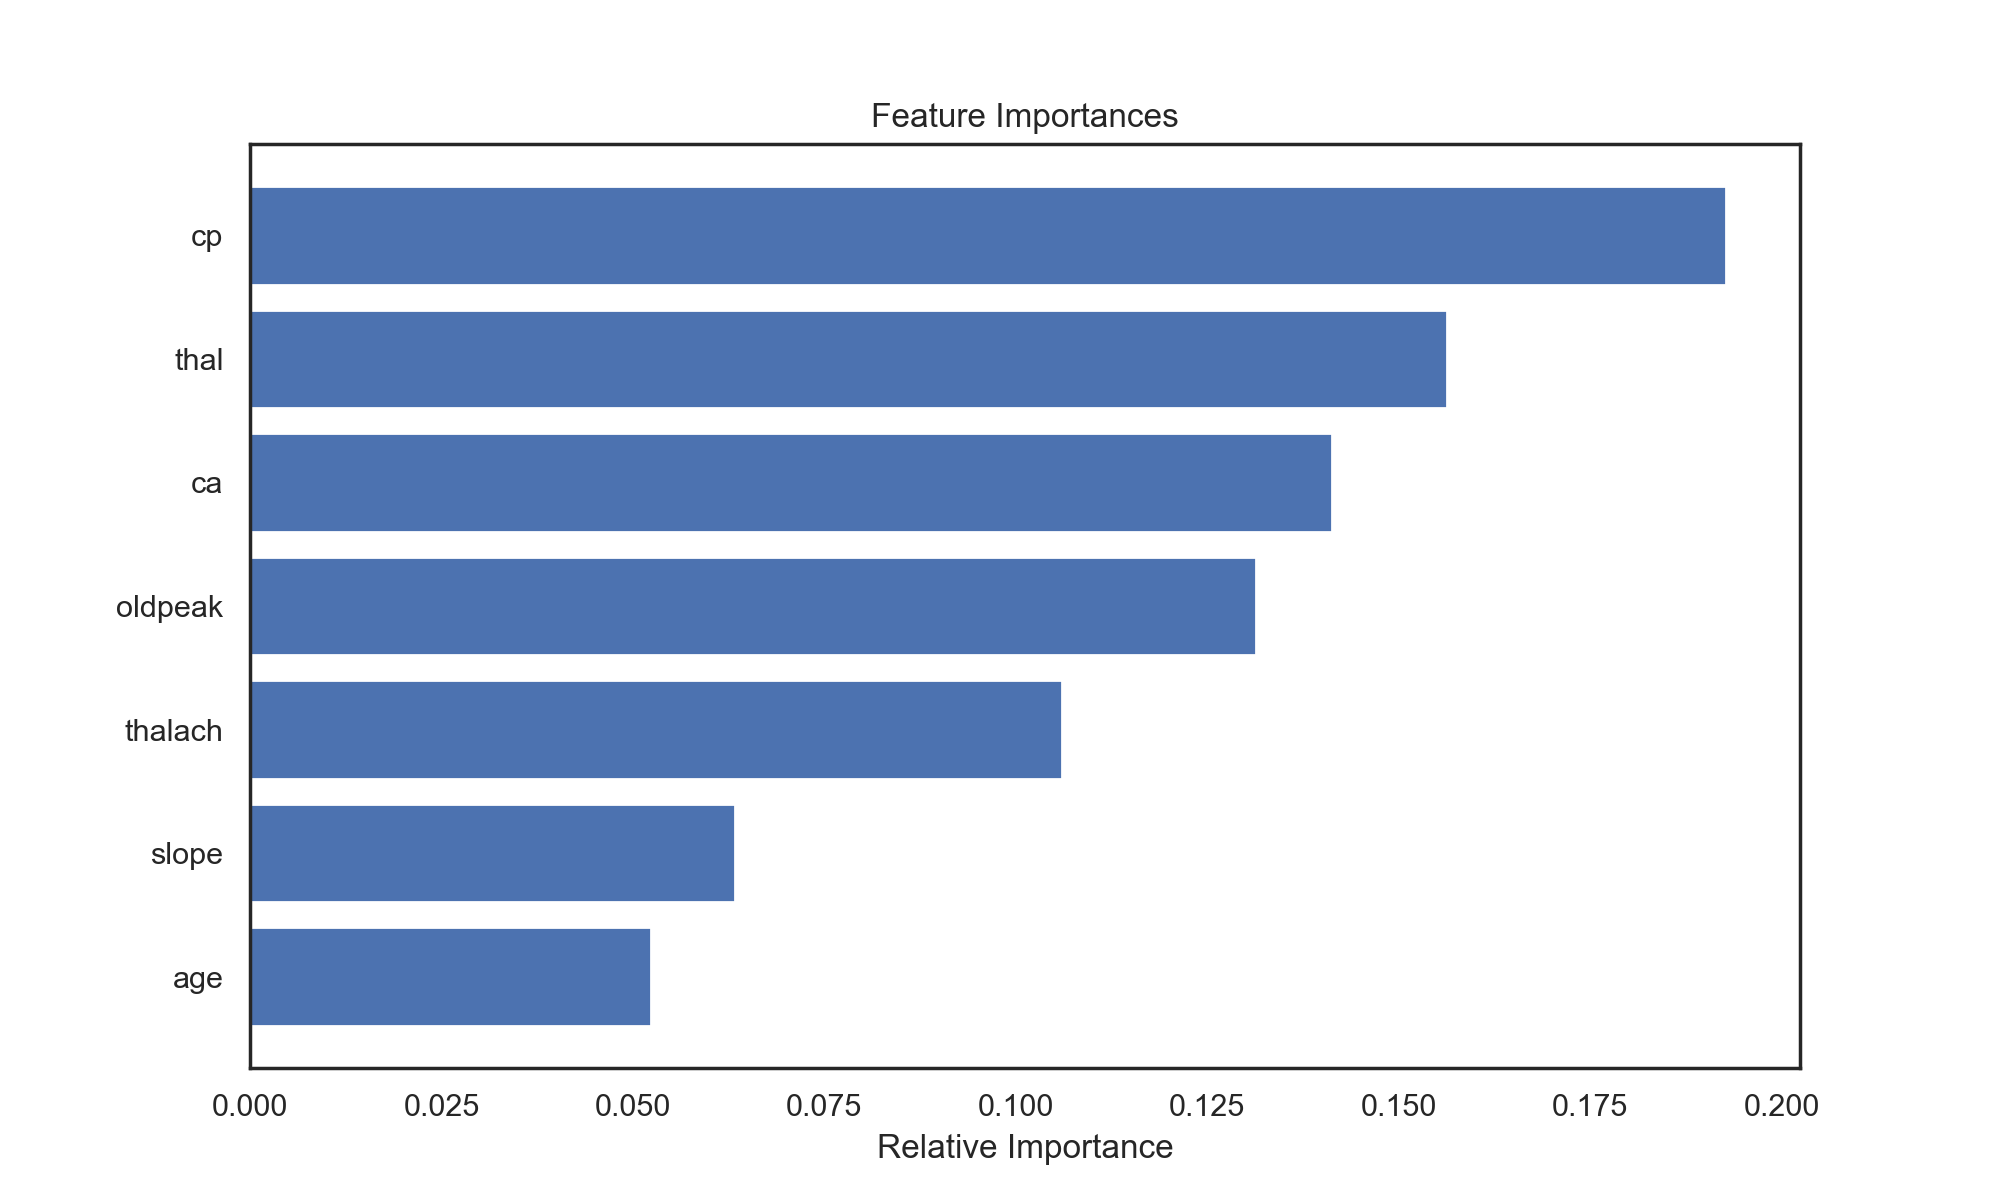

In [170]:
# extract important features from the random forest
# plot top ten important fearture in the random forest model
#features = Train_data.columns
importances = model_clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 7

plt.figure(figsize=(10,6))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [171]:
# evaluate training model
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_Train_scaled)
    test_pred = model_pipeline.predict(X_Test_scaled)
    
    train_pred_proba = model_pipeline.predict_proba(X_Train_scaled)
    test_pred_proba = model_pipeline.predict_proba(X_Test_scaled)
    
    # evaluations
    print('Training & Validation ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_test, test_pred_proba[:, 1])))
    print('')
    print('Training & Validation Confusion Metrices:')
    print('Training   confusion matrix:\n', confusion_matrix(y_train, train_pred))
    print('Validation confusion matrix:\n', confusion_matrix(y_test, test_pred))

In [172]:
evaluate_model(model_clf)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.9815
Validation roc auc score= 0.9548

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[309  31]
 [ 17 360]]
Validation confusion matrix:
 [[126  33]
 [  8 141]]


# Model Building

### train the important features from the dataset with Random forest classifier 

In [173]:
imp_features = list([features[i] for i in indices[-num_features:]])

In [174]:
# Build new data set with important features
n_Train_data = heart_train_data[imp_features]
n_Train_data["target"] = heart_train_data["target"]
n_Train_data.head()

age  slope  thalach  oldpeak  ca  thal  cp  target
0   52      2      168      1.0   2     3   0       0
1   53      0      155      3.1   0     3   0       0
2   70      0      125      2.6   0     3   0       0
3   61      2      161      0.0   1     3   0       0
4   62      1      106      1.9   3     2   0       0

In [175]:
#rnd_Train_data = Train_data[numerical_cols]

X = n_Train_data.drop(columns='target')
y = n_Train_data.target

#save the feature name and target variables
labels = y.unique()



In [176]:
# Building random forest model
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

# Standarize data with StandarScaler
X_Train_scaled = MinMaxScaler().fit_transform(X_train)
X_Test_scaled = MinMaxScaler().fit_transform(X_test)
print(X_Train_scaled[0:5])

[[0.625      1.         0.70992366 0.         0.         0.66666667
  0.33333333]
 [0.60416667 0.5        0.45801527 0.35483871 0.75       1.
  0.        ]
 [0.3125     0.5        0.59541985 0.0483871  0.25       0.66666667
  0.66666667]
 [0.4375     0.5        0.70229008 0.09677419 0.25       1.
  0.66666667]
 [0.29166667 0.5        0.71755725 0.03225806 0.         0.66666667
  0.66666667]]


In [177]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes= 16, n_jobs=-1)
model_clf = rnd_clf.fit(X_Train_scaled, y_train)

y_pred_rf = model_clf.predict(X_Test_scaled) 

In [178]:
evaluate_model(model_clf)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.9764
Validation roc auc score= 0.9469

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[303  37]
 [ 14 363]]
Validation confusion matrix:
 [[130  29]
 [ 13 136]]


## Gradient Boosting Model

In [179]:
# create gradient boosting model
#lgbm = LGBMClassifier(n_estimators=10, num_leaves=36, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, max_depth=1, learning_rate=0.5, class_weight='balanced', num_leaves =42, random_state=22)

# train model
model3 = lgbm.fit(X_Train_scaled, y_train)

# evaluate model
evaluate_model(model3)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.9580
Validation roc auc score= 0.9290

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[304  36]
 [ 37 340]]
Validation confusion matrix:
 [[133  26]
 [ 23 126]]


### Turning hyperparameter with Baysian optimization

In [181]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold

In [182]:
def lgbm_evaluate(**params):
    
    '''
    method for optimization of auc score
    '''
    
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    # params['n_estimators'] = int(params['n_estimators'])
            
    clf = LGBMClassifier(**params,n_estimators=10000,nthread = -1,random_state=42)

    folds = KFold(n_splits = 2, shuffle = True, random_state = 42)
    
    test_pred_proba = np.zeros(y_train.shape[0])
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_Train_scaled,y_train)):
        train_x, train_y = X_Train_scaled[train_idx], y_train.iloc[train_idx]
        valid_x, valid_y = X_Train_scaled[valid_idx], y_train.iloc[valid_idx]
    

        clf.fit(train_x, train_y, 
             eval_set = [(train_x, train_y), (valid_x, valid_y)], eval_metric = 'auc', 
                verbose = False, early_stopping_rounds = 100)
        
        test_pred_proba[valid_idx] = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)[:, 1]

    return roc_auc_score(y_train, test_pred_proba)
    
    
params = {'colsample_bytree': (0.8, 1), #the fraction of columns to be randomly samples
          'learning_rate': (.01, .02), 
          'num_leaves': (30, 40),  #max leaf nodes
          'subsample': (0.8, 1),  #fraction of observations to be randomly samples for each tree.
          'max_depth': (1, 10),  #maximum depth of a tree
          'reg_alpha': (.03, .05),  #L1 regularization
          'reg_lambda': (.06, .08), #L2 regularization
         }

bo = BayesianOptimization(lgbm_evaluate, params)
bo.maximize(init_points = 20, n_iter = 4) 
 #init_points exploration points
 #n_iter exploitation(how deep to exploit those points)

|   iter    |  target   | colsam... | learni... | max_depth | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  1        |  0.9589   |  0.9377   |  0.01761  |  3.505    |  32.32    |  0.03159  |  0.07346  |  0.865    |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        |  0.9697   |  0.8737   |  0.01884  |  8.598    |  37.96    |  0.03458  |  0.06518  |  0.9837   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  20       |  0.9682   |  0.9438   |  0.01398  |  9.952    |  35.13    |  0.03587  |  0.06658  |  0.8944   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  21       |  0.97     |  1.0      |  0.02     |  10.0     |  38.39    |  0.05     |  0.08     |  0.8      |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  22       |  0.9664   |  1.0      |  0.01     |  8.018    |  39.63    |  0.04368  |  0.08     |  0.8      |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overr

In [183]:
params_gbm = bo.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
#params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm

{'colsample_bytree': 0.9230051264226502,
 'learning_rate': 0.014863851671646285,
 'max_depth': 10,
 'num_leaves': 39.7854858685359,
 'reg_alpha': 0.044181263817151054,
 'reg_lambda': 0.06662644277571063,
 'subsample': 0.9627740845077878}

In [184]:
# create gradient boosting model
#lgbm = LGBMClassifier(n_estimators=10, num_leaves=36, random_state=42)
lgbm = LGBMClassifier(colsample_bytree=0.87,
                              learning_rate= 0.0172,
                              max_depth=10,
                              n_estimators=100,
                              num_leaves=30,
                              nthread =-1,
                              reg_alpha= 0.03,
                              reg_lambda= 0.076,
                              subsample=0.94,
                              random_state=42,
                              class_weight='balanced'
                              )
# train model
model4 = lgbm.fit(X_Train_scaled, y_train)

# evaluate model
evaluate_model(model4)

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.9880
Validation roc auc score= 0.9595

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[309  31]
 [ 12 365]]
Validation confusion matrix:
 [[132  27]
 [ 13 136]]
